In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load tickers from a CSV file
tickers_df = pd.read_csv('../data/Tickers.csv')  # Ensure this file contains updated tickers
tickers = tickers_df['Ticker'].tolist()  # Adjust based on the column name in your CSV

In [3]:
tickers

['RELIANCE.NS',
 'TCS.NS',
 'BHARTIARTL.NS',
 'MRF.NS',
 'WIPRO.NS',
 'SBIN.NS',
 'ITC.NS',
 'KOTAKBANK.NS',
 'BAJFINANCE.NS',
 'ULTRACEMCO.NS',
 'TITAN.NS',
 'ASIANPAINT.NS',
 'HCLTECH.NS',
 'INFY.BO',
 'HDFCBANK.BO',
 'ICICIBANK.BO',
 'ADANIPOWER.BO',
 'APOLLOHOSP.BO',
 'HEROMOTOCO.BO',
 'MARUTI.BO']

In [4]:
from datetime import datetime, timedelta
# Get today's date as the end date
end_date = datetime.today().strftime('%Y-%m-%d')
# Calculate the start date (10 years before end date)
start_date = (datetime.today().replace(year=datetime.today().year - 10)).strftime('%Y-%m-%d')

In [5]:
print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2015-04-12
End Date: 2025-04-12


In [6]:
# Download historical data for each ticker without specifying date range
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=False)
stock_data = data.stack(level=1).reset_index()
# Rename columns to make it more clear
stock_data.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [7]:
stock_data.head()

Date         Ticker         Open         High          Low  \
0 2015-04-13  ADANIPOWER.BO    49.450001    49.450001    50.150002   
1 2015-04-13  APOLLOHOSP.BO  1346.553955  1396.599976  1411.000000   
2 2015-04-13  ASIANPAINT.NS   800.608276   862.049988   865.549988   
3 2015-04-13  BAJFINANCE.NS   432.259979   445.375000   452.209991   
4 2015-04-13  BHARTIARTL.NS   364.406982   383.665222   384.836853   

         Close    Adj Close     Volume  
0    48.900002    49.799999   521306.0  
1  1385.250000  1394.900024     5753.0  
2   852.400024   860.000000   805167.0  
3   442.000000   452.209991   300820.0  
4   367.712952   368.704346  4307880.0

In [8]:
stock_data['Ticker'].value_counts()

ITC.NS           2470
KOTAKBANK.NS     2470
ULTRACEMCO.NS    2470
TITAN.NS         2470
TCS.NS           2470
SBIN.NS          2470
RELIANCE.NS      2470
MRF.NS           2470
WIPRO.NS         2470
HCLTECH.NS       2470
BHARTIARTL.NS    2470
BAJFINANCE.NS    2470
ASIANPAINT.NS    2470
INFY.BO          2447
HDFCBANK.BO      2447
MARUTI.BO        2445
APOLLOHOSP.BO    2444
ICICIBANK.BO     2444
HEROMOTOCO.BO    2444
ADANIPOWER.BO    2444
Name: Ticker, dtype: int64

In [9]:
stock_data.tail()

Date         Ticker          Open          High           Low  \
49220 2025-04-11        SBIN.NS    753.849976    753.849976    759.700012   
49221 2025-04-11         TCS.NS   3231.500000   3231.500000   3298.949951   
49222 2025-04-11       TITAN.NS   3234.899902   3234.899902   3242.550049   
49223 2025-04-11  ULTRACEMCO.NS  11502.650391  11502.650391  11842.349609   
49224 2025-04-11       WIPRO.NS    239.750000    239.750000    245.000000   

              Close     Adj Close      Volume  
49220    746.000000    759.000000   9360327.0  
49221   3206.000000   3289.550049   7108961.0  
49222   3201.250000   3222.000000    814920.0  
49223  11454.049805  11842.349609    351037.0  
49224    238.350006    245.000000  11205821.0

In [10]:
# View dimensions of dataset   
rows, col = stock_data.shape
print ("Dimensions of dataset: {}" . format (stock_data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (49225, 8)
Rows: 49225 
Columns: 8


In [11]:
# Dtype
print(f'The data type contains:\n object --> {stock_data.dtypes.value_counts()[1]}\n float64 --> {stock_data.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49225 entries, 0 to 49224
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       49225 non-null  datetime64[ns]
 1   Ticker     49225 non-null  object        
 2   Open       49225 non-null  float64       
 3   High       49225 non-null  float64       
 4   Low        49225 non-null  float64       
 5   Close      49225 non-null  float64       
 6   Adj Close  49225 non-null  float64       
 7   Volume     49225 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.0+ MB


In [13]:
float_cols = stock_data.columns.drop(["Ticker","Date"])
stock_data[float_cols] = stock_data[float_cols].round().astype("Int64")
stock_data.head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0 2015-04-13  ADANIPOWER.BO    49    49    50     49         50   521306
1 2015-04-13  APOLLOHOSP.BO  1347  1397  1411   1385       1395     5753
2 2015-04-13  ASIANPAINT.NS   801   862   866    852        860   805167
3 2015-04-13  BAJFINANCE.NS   432   445   452    442        452   300820
4 2015-04-13  BHARTIARTL.NS   364   384   385    368        369  4307880

In [14]:
stock_data.sort_values(by="Date").head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0  2015-04-13  ADANIPOWER.BO    49    49    50     49         50   521306
19 2015-04-13       WIPRO.NS   113   117   117    115        116  4619465
18 2015-04-13  ULTRACEMCO.NS  2891  3001  3029   2952       2970   238104
17 2015-04-13       TITAN.NS   393   415   418    401        401  1399618
16 2015-04-13         TCS.NS  1116  1328  1332   1314       1332  1308642

In [15]:
stock_data1 = stock_data[(stock_data['Ticker'] == 'RELIANCE.NS')]    
stock_data1.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
14 2015-04-13  RELIANCE.NS   206   211  211    205        207  20177342
34 2015-04-15  RELIANCE.NS   206   211  215    207        211  22231264
54 2015-04-16  RELIANCE.NS   207   212  214    210        211  20177302
74 2015-04-17  RELIANCE.NS   207   212  216    211        214  23958678
94 2015-04-20  RELIANCE.NS   198   202  214    201        214  37628162

In [16]:
# View dimensions of dataset   
rows, col = stock_data1.shape
print ("Dimensions of dataset: {}" . format (stock_data1.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2470, 8)
Rows: 2470 
Columns: 8


In [17]:
# Dtype
print(f'The data type contains:\n object --> {stock_data1.dtypes.value_counts()[1]}\n float64 --> {stock_data1.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [18]:
stock_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2470 entries, 14 to 49219
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2470 non-null   datetime64[ns]
 1   Ticker     2470 non-null   object        
 2   Open       2470 non-null   Int64         
 3   High       2470 non-null   Int64         
 4   Low        2470 non-null   Int64         
 5   Close      2470 non-null   Int64         
 6   Adj Close  2470 non-null   Int64         
 7   Volume     2470 non-null   Int64         
dtypes: Int64(6), datetime64[ns](1), object(1)
memory usage: 188.1+ KB


In [19]:
stock_data2 = stock_data1.copy()

In [20]:
# Dtype
print(f'The data type contains:\n object --> {stock_data2.dtypes.value_counts()[1]}\n int64 --> {stock_data2.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 int64 --> 6


In [21]:
stock_data2.sort_values(by="Date").head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
14 2015-04-13  RELIANCE.NS   206   211  211    205        207  20177342
34 2015-04-15  RELIANCE.NS   206   211  215    207        211  22231264
54 2015-04-16  RELIANCE.NS   207   212  214    210        211  20177302
74 2015-04-17  RELIANCE.NS   207   212  216    211        214  23958678
94 2015-04-20  RELIANCE.NS   198   202  214    201        214  37628162

In [22]:
# Plotting count plot by year
Year = stock_data2['Date'].dt.year

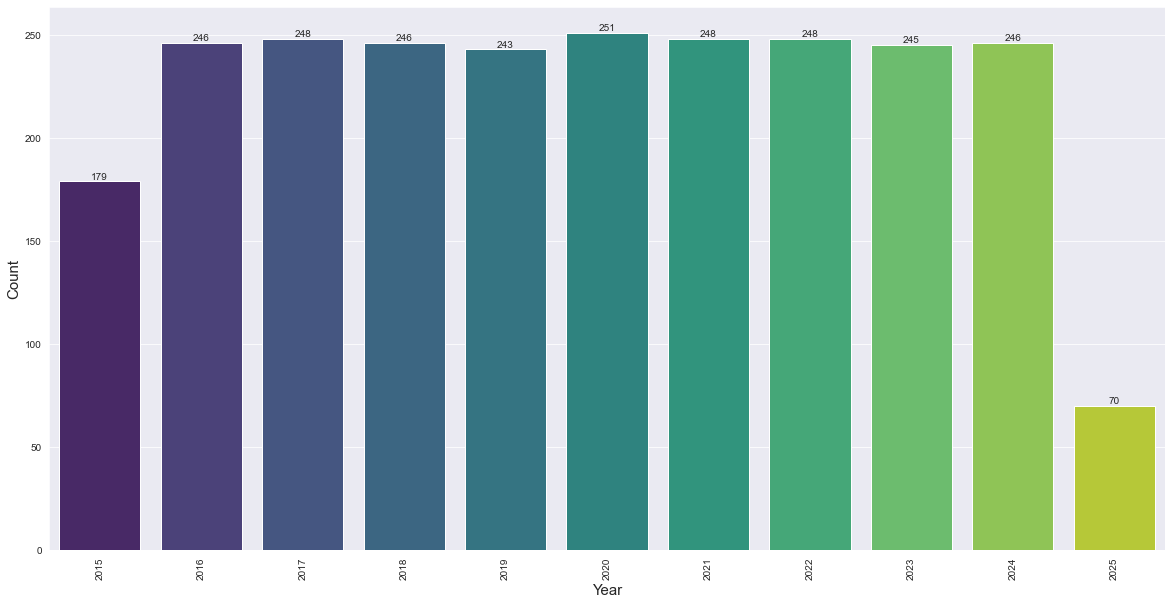

In [23]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data2, x=Year, palette='viridis')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

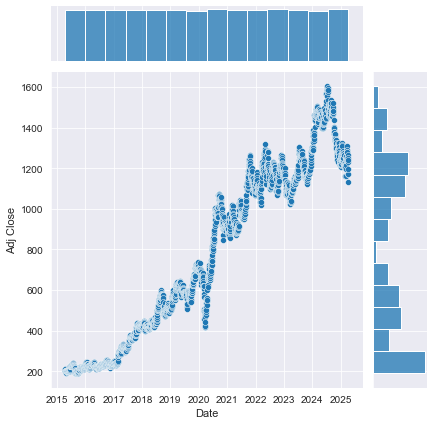

In [24]:
# Target-Date
sns.jointplot(data=stock_data2, x="Date", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Date", fontsize=11)
plt.show()

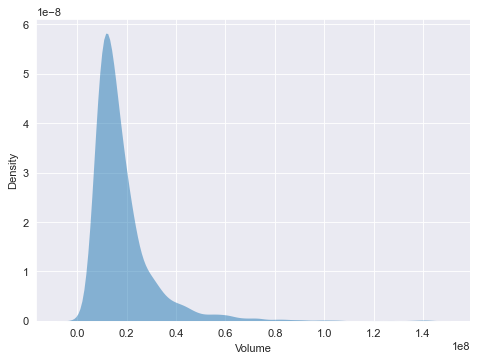

In [25]:
# The data distribution in "Volume"
plt.figure(figsize=(7,5), dpi=80)
sns.kdeplot(data=stock_data2, x="Volume", fill=True, common_norm=False,
            palette="crest", alpha=.5, linewidth=0)
plt.show()

In [26]:
# Assessing the 0 values of the "Volume" column
len(stock_data2[stock_data2["Volume"]==0])

1

In [27]:
stock_data3 = stock_data2[stock_data2["Volume"] != 0]

In [28]:
stock_data3.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
14 2015-04-13  RELIANCE.NS   206   211  211    205        207  20177342
34 2015-04-15  RELIANCE.NS   206   211  215    207        211  22231264
54 2015-04-16  RELIANCE.NS   207   212  214    210        211  20177302
74 2015-04-17  RELIANCE.NS   207   212  216    211        214  23958678
94 2015-04-20  RELIANCE.NS   198   202  214    201        214  37628162

In [29]:
# Assessing the 0 values of the "Volume" column
len(stock_data3[stock_data3["Volume"]==0])

0

In [30]:
# Assessing the 0 values of the "Volume" column
len(stock_data[stock_data["Volume"]==0])

13

In [31]:
stock_data = stock_data[stock_data["Volume"] != 0]

In [32]:
stock_data.head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0 2015-04-13  ADANIPOWER.BO    49    49    50     49         50   521306
1 2015-04-13  APOLLOHOSP.BO  1347  1397  1411   1385       1395     5753
2 2015-04-13  ASIANPAINT.NS   801   862   866    852        860   805167
3 2015-04-13  BAJFINANCE.NS   432   445   452    442        452   300820
4 2015-04-13  BHARTIARTL.NS   364   384   385    368        369  4307880

In [33]:
# Plotting count plot by year
Year1 = stock_data['Date'].dt.year

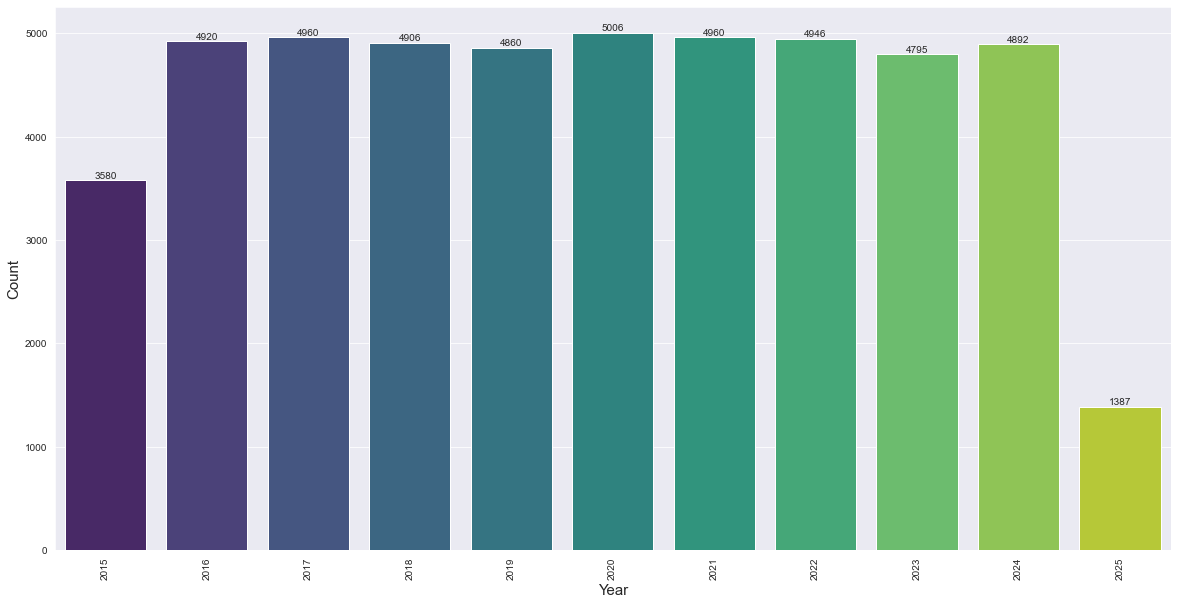

In [34]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data, x=Year1, palette='viridis')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [35]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The min value of ",i," is ",stock_data[i].min())

The min value of  Open  is  15
The min value of  High  is  15
The min value of  Low  is  16
The min value of  Close  is  15
The min value of  Adj Close  is  16
The min value of  Volume  is  534


In [36]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The max value of ",i," is ",stock_data[i].max())

The max value of  Open  is  150504
The max value of  High  is  150725
The max value of  Low  is  151445
The max value of  Close  is  150050
The max value of  Adj Close  is  150850
The max value of  Volume  is  326148900


In [37]:
# List of price-related columns
columns_to_modify = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Replace values < 100 with NaN
stock_data[columns_to_modify] = stock_data[columns_to_modify].applymap(lambda x: np.nan if x < 100 else x)

In [38]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker                  0
Open                 1967
High                 1850
Low                  1803
Close                1907
Adj Close            1841
Volume                  0

In [39]:
columns_no_varience = []
for col in stock_data.columns:
    if len(stock_data[col].unique()) ==1:
        columns_no_varience.append(col)
        stock_data.drop([col], axis = 1, inplace = True)
print(columns_no_varience)
print (stock_data.shape)

[]
(49212, 8)


In [40]:
duplicate_rows = stock_data.duplicated()
print(duplicate_rows.any())
stock_data.drop_duplicates(inplace = True)
print(stock_data.shape)

False
(49212, 8)


In [41]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'before outlier treatment: ', stock_data[column].skew())

Skewness of Open before outlier treatment:  4.858477239992066
Skewness of High before outlier treatment:  4.845401381156565
Skewness of Close before outlier treatment:  4.84647596551093
Skewness of Low before outlier treatment:  4.843620332023601
Skewness of Adj Close before outlier treatment:  4.847192885756459


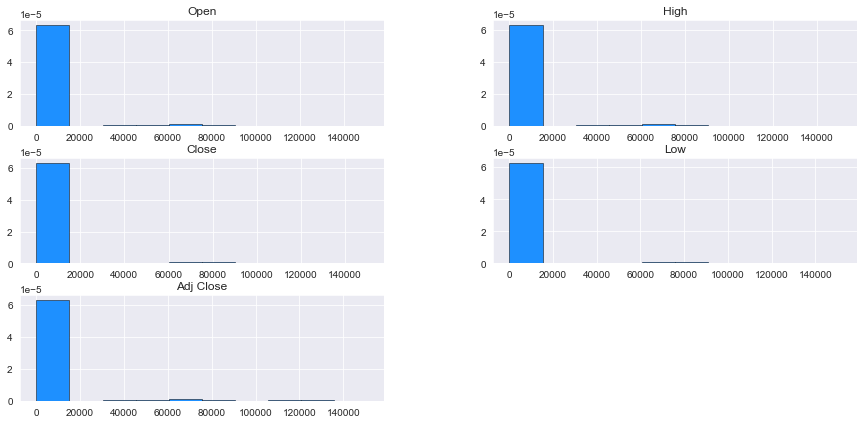

In [42]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

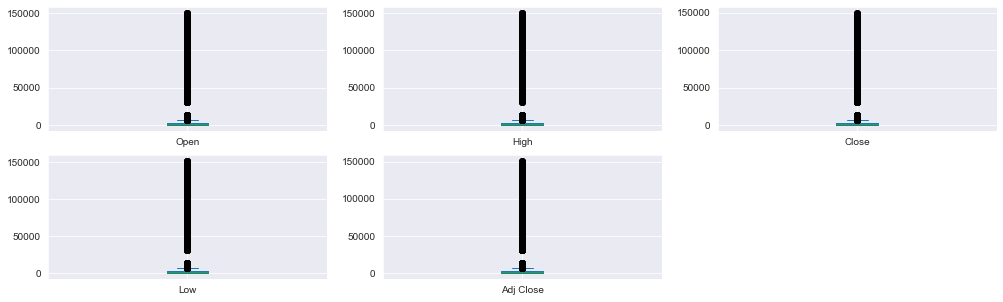

In [43]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

In [44]:
stock_data['Open'].isna().sum()

1967

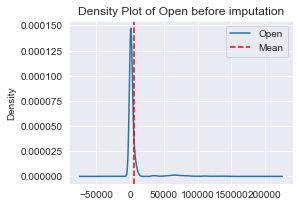

In [45]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [46]:
stock_data['Open']=stock_data.groupby(['Date'], group_keys=False)['Open'].apply(lambda x:x.fillna(x.median()))
stock_data['Open'].isna().sum()

0

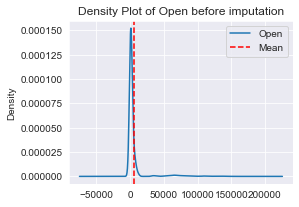

In [47]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [48]:
stock_data['Close'].isna().sum()

1907

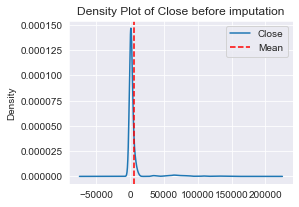

In [49]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close before imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [50]:
stock_data['Close']=stock_data.groupby(['Date'], group_keys=False)['Close'].apply(lambda x:x.fillna(x.median()))
stock_data['Close'].isna().sum()

0

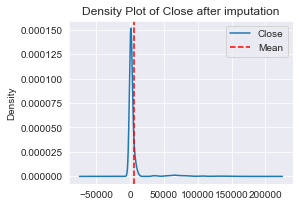

In [51]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close after imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [52]:
stock_data['Low'].isna().sum()

1803

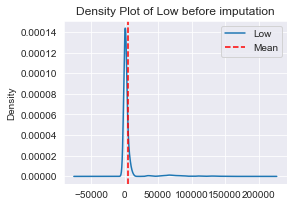

In [53]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low before imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [54]:
stock_data['Low']=stock_data.groupby(['Date'], group_keys=False)['Low'].apply(lambda x:x.fillna(x.median()))
stock_data['Low'].isna().sum()

0

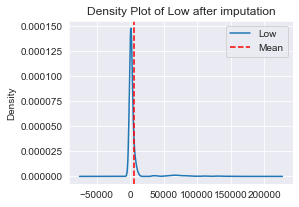

In [55]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low after imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [56]:
stock_data['High'].isna().sum()

1850

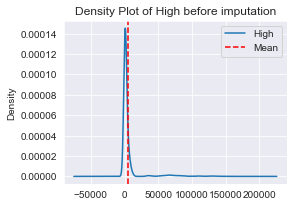

In [57]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [58]:
stock_data['High']=stock_data.groupby(['Date'], group_keys=False)['High'].apply(lambda x:x.fillna(x.median()))
stock_data['High'].isna().sum()

0

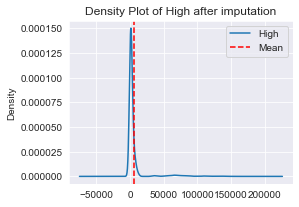

In [59]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High after imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [60]:
stock_data['Adj Close'].isna().sum()

1841

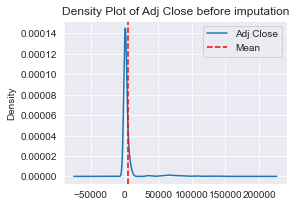

In [61]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [62]:
stock_data['Adj Close']=stock_data.groupby(['Date'], group_keys=False)['Adj Close'].apply(lambda x:x.fillna(x.median()))
stock_data['Adj Close'].isna().sum()

0

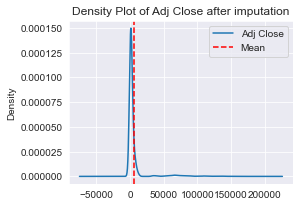

In [63]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close after imputation')
plt.axvline(x=stock_data['Adj Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [64]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    Q1 = stock_data[column].quantile(0.25)
    Q3 = stock_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Drop NaN values before comparison
    column_data = stock_data[column].dropna()
    outliers = [x for x in column_data if x < lower or x > upper]

    print(column)
    print('Identified outliers: %d' % len(outliers))
    print('*' * 40)

Open
Identified outliers: 5873
****************************************
High
Identified outliers: 5274
****************************************
Close
Identified outliers: 5275
****************************************
Low
Identified outliers: 5276
****************************************
Adj Close
Identified outliers: 5270
****************************************


In [65]:
# Define price-related columns
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Calculate IQR for each column
Q1 = stock_data[price_columns].quantile(0.25)
Q3 = stock_data[price_columns].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range (1.5 * IQR Rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
stock_data = stock_data[~((stock_data[price_columns] < lower_bound) | (stock_data[price_columns] > upper_bound)).any(axis=1)]

In [66]:
# Calculate IQR for the Volume column
Q1 = stock_data['Volume'].quantile(0.25)  # 25th percentile
Q3 = stock_data['Volume'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
stock_data = stock_data[(stock_data['Volume'] >= lower_bound) & (stock_data['Volume'] <= upper_bound)]

In [67]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'after outlier treatment: ', stock_data[column].skew())

Skewness of Open after outlier treatment:  1.4518109749629946
Skewness of High after outlier treatment:  1.3781557305974552
Skewness of Close after outlier treatment:  1.3772655290610842
Skewness of Low after outlier treatment:  1.381168574089265
Skewness of Adj Close after outlier treatment:  1.3811783879774948


In [68]:
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Apply log transformation
stock_data[price_columns] = np.log1p(stock_data[price_columns])

In [69]:
# Apply log transformation
stock_data['Volume'] = np.log1p(stock_data['Volume'])

In [70]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'after outlier treatment: ', stock_data[column].skew())

Skewness of Open after outlier treatment:  -0.20783874868743615
Skewness of High after outlier treatment:  -0.23128445577312592
Skewness of Close after outlier treatment:  -0.22521552880175072
Skewness of Low after outlier treatment:  -0.23561423181596186
Skewness of Adj Close after outlier treatment:  -0.23185248900631958


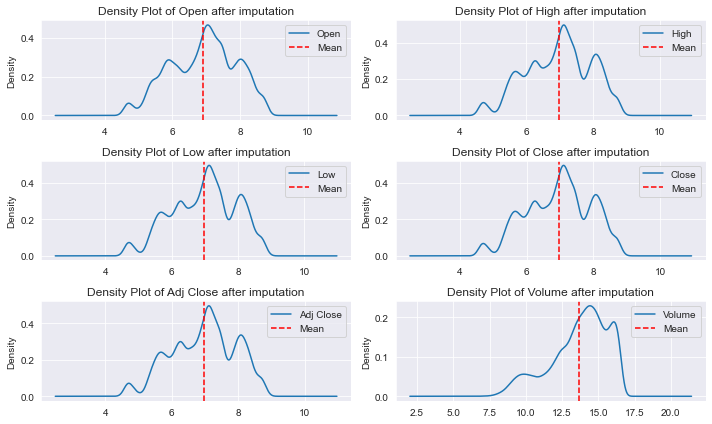

In [71]:
# Exclude unwanted columns
col = stock_data.columns.drop(['Ticker', 'Date'])

# Number of plots per row
plots_per_row = 2

# Initialize subplots
fig, axes = plt.subplots(nrows=(len(col) + 1) // plots_per_row, ncols=plots_per_row, figsize=(10, 6))
axes = axes.flatten()  # Flatten axes array for easy iteration

for idx, i in enumerate(col):
    stock_data[i].plot(kind='density', ax=axes[idx], figsize=(10, 6))
    axes[idx].set_title(f'Density Plot of {i} after imputation')
    axes[idx].axvline(x=stock_data[i].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].legend()

# Hide unused axes (if any)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

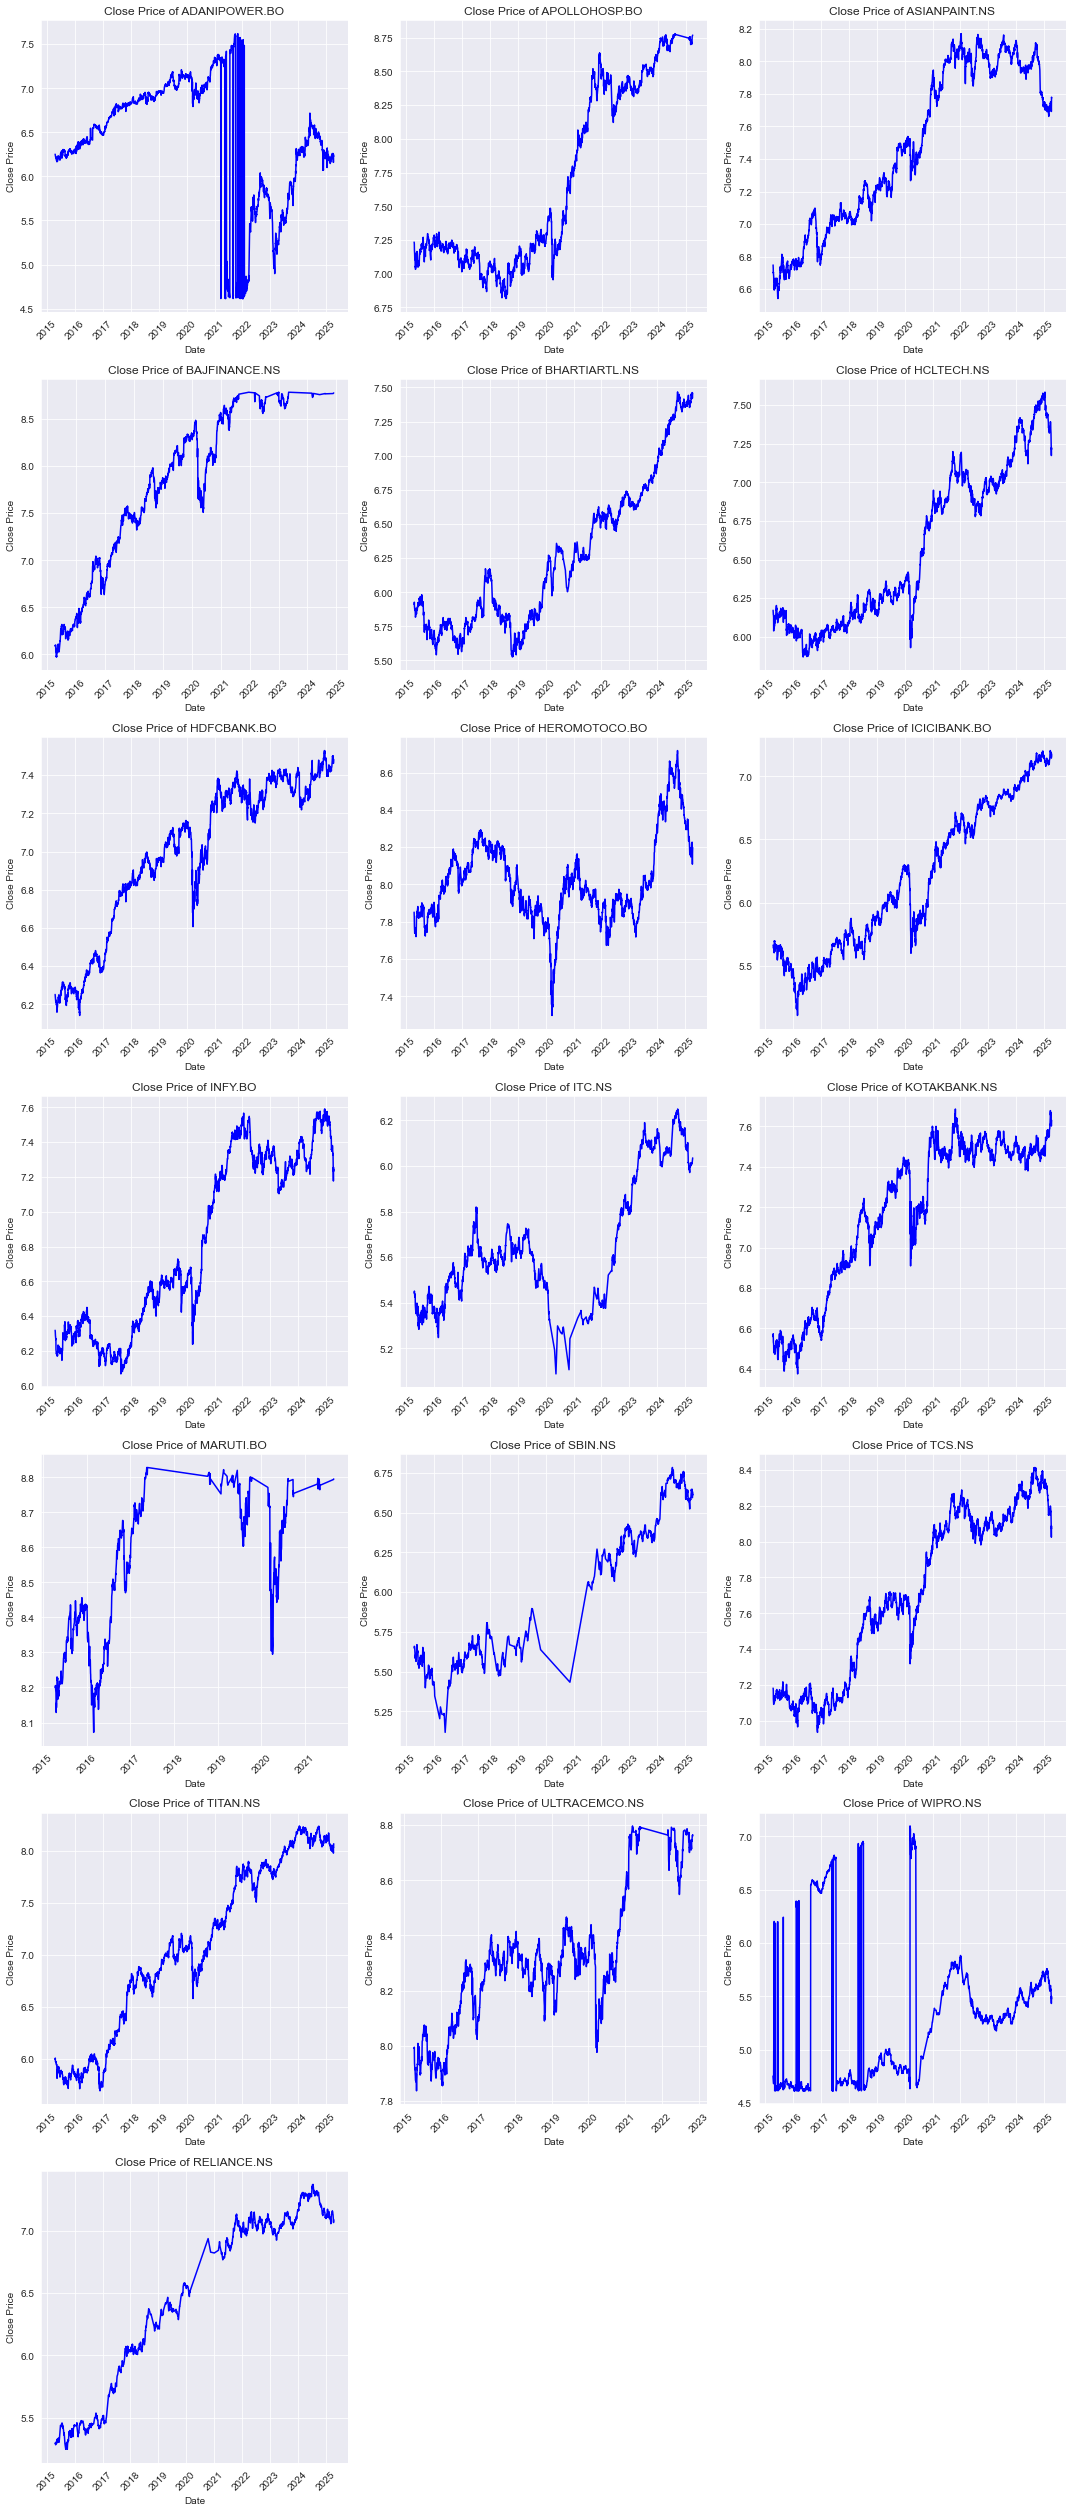

In [72]:
import math
# Unique tickers
tickers = stock_data['Ticker'].unique()
num_tickers = len(tickers)

# Set rows and columns (3 graphs per row)
plots_per_row = 3
rows = math.ceil(num_tickers / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=plots_per_row, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each ticker's Close Price
for idx, ticker in enumerate(tickers):
    temp_df = stock_data[stock_data['Ticker'] == ticker]  # Filter for ticker
    axes[idx].plot(temp_df['Date'], temp_df['Close'], linestyle='-', color='b')
    axes[idx].set_title(f"Close Price of {ticker}")
    axes[idx].set_xlabel("Date")
    axes[idx].set_ylabel("Close Price")
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True)

# Hide any extra unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for clarity
plt.show()

In [73]:
stock_data['Ticker'].value_counts()

ASIANPAINT.NS    2469
TCS.NS           2464
TITAN.NS         2463
KOTAKBANK.NS     2450
HDFCBANK.BO      2447
INFY.BO          2446
HEROMOTOCO.BO    2444
ICICIBANK.BO     2442
HCLTECH.NS       2441
ADANIPOWER.BO    2437
APOLLOHOSP.BO    2287
BHARTIARTL.NS    2173
WIPRO.NS         1931
BAJFINANCE.NS    1726
ITC.NS           1631
ULTRACEMCO.NS    1624
RELIANCE.NS      1374
SBIN.NS          1038
MARUTI.BO         766
Name: Ticker, dtype: int64

In [74]:
stock_data.loc[(stock_data['Ticker'] == 'MARUTI.BO') , 'Ticker'] = np.nan
stock_data.loc[(stock_data['Ticker'] == 'ADANIPOWER.BO') , 'Ticker'] = np.nan

In [75]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker               3203
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [76]:
stock_data = stock_data.dropna(subset=['Ticker'])

In [77]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker                  0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

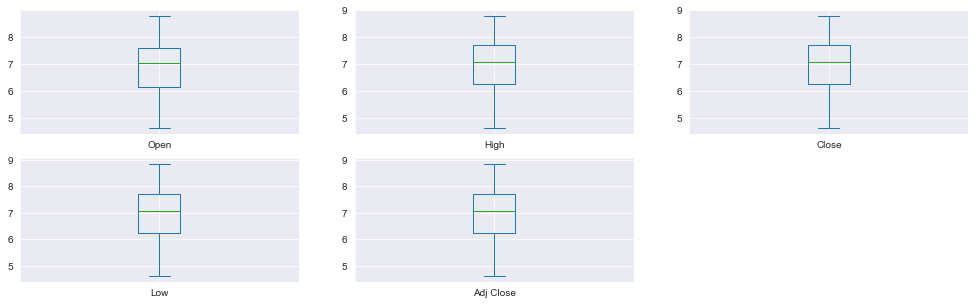

In [78]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

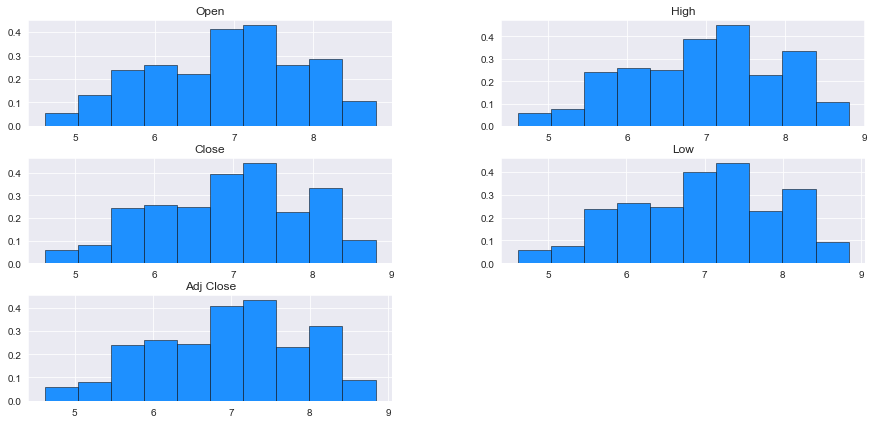

In [79]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

<AxesSubplot:>

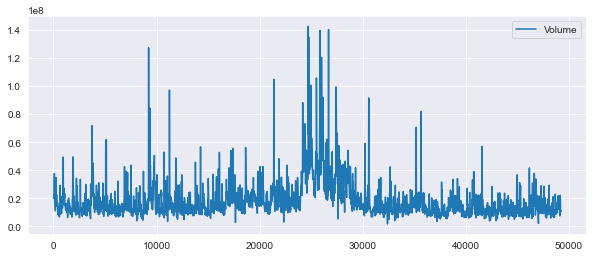

In [80]:
# Now let's plot the total volume of stock being traded each day over the past year
stock_data3['Volume'].plot(legend=True, figsize=(10,4))

In [81]:
# Condition for Bullish case: Low ≤ Open ≤ Close ≤ High
bullish_condition = (stock_data["Low"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["High"])
# Condition for Bearish case: Low ≤ Close ≤ Open ≤ High
bearish_condition = (stock_data["Low"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["High"])
# Rows that do not satisfy either condition
invalid_rows = stock_data[~(bullish_condition | bearish_condition)]
# Print invalid rows if any
if not invalid_rows.empty:
    print("Invalid rows found that do not match Bullish or Bearish cases:")
    print(invalid_rows)
else:
    print("All rows in stock_data are valid.")

Invalid rows found that do not match Bullish or Bearish cases:
            Date         Ticker      Open      High       Low     Close  \
1     2015-04-13  APOLLOHOSP.BO  7.206377  7.242798  7.252762  7.234177   
2     2015-04-13  ASIANPAINT.NS  6.687109  6.760415  6.765039  6.748760   
3     2015-04-13  BAJFINANCE.NS  6.070738  6.100319  6.115892  6.093570   
4     2015-04-13  BHARTIARTL.NS  5.899897  5.953243  5.955837  5.910797   
5     2015-04-13     HCLTECH.NS  5.942799  6.192362  6.194405  6.171701   
...          ...            ...       ...       ...       ...       ...   
49219 2025-04-11    RELIANCE.NS  7.106606  7.106606  7.109879  7.086738   
49220 2025-04-11        SBIN.NS  6.626718  6.626718  6.634633  6.616065   
49221 2025-04-11         TCS.NS  8.081166  8.081166  8.101678  8.073091   
49222 2025-04-11       TITAN.NS  8.082093  8.082093  8.084562  8.071531   
49224 2025-04-11       WIPRO.NS  5.484797  5.484797  5.505332  5.476464   

       Adj Close     Volume  
1     

In [82]:
# Fix 'Low' price (should be the minimum of Open, Adj Close, and itself)
stock_data["Low"] = stock_data[["Low", "Open", "Adj Close"]].min(axis=1)

# Fix 'High' price (should be the maximum of Open, Adj Close, and itself)
stock_data["High"] = stock_data[["High", "Open", "Adj Close"]].max(axis=1)

# Ensure 'Low' is never greater than 'High'
stock_data["Low"] = stock_data[["Low", "High"]].min(axis=1)

In [83]:
# Re-check if all rows are now valid
bullish_condition = (stock_data["Low"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["High"])
bearish_condition = (stock_data["Low"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["High"])

# Find still invalid rows
invalid_rows = stock_data[~(bullish_condition | bearish_condition)]

if invalid_rows.empty:
    print("All rows are now valid!")
else:
    print("Some rows are still invalid:")
    print(invalid_rows)

All rows are now valid!


In [84]:
stock_data.describe()

Open          High           Low         Close     Adj Close  \
count  35850.000000  35850.000000  35850.000000  35850.000000  35850.000000   
mean       6.908472      6.977456      6.900835      6.956160      6.966791   
std        0.954473      0.937817      0.963091      0.943418      0.945897   
min        4.615121      4.634729      4.615121      4.615121      4.615121   
25%        6.122493      6.257668      6.111467      6.236370      6.246107   
50%        7.012115      7.074540      7.010312      7.057898      7.069874   
75%        7.595890      7.709196      7.593878      7.686162      7.698936   
max        8.782016      8.841737      8.782016      8.796793      8.841737   

          Volume  
count    35850.0  
mean   13.752826  
std      2.00586  
min     6.854355  
25%    12.628802  
50%    14.151468  
75%    15.273638  
max    16.564627

In [85]:
stock_data.corr()   

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.996746  0.993293  0.992344   0.990527 -0.480315
High       0.996746  1.000000  0.990592  0.995865   0.994242 -0.498242
Low        0.993293  0.990592  1.000000  0.994069   0.995617 -0.482977
Close      0.992344  0.995865  0.994069  1.000000   0.998140 -0.499666
Adj Close  0.990527  0.994242  0.995617  0.998140   1.000000 -0.500116
Volume    -0.480315 -0.498242 -0.482977 -0.499666  -0.500116  1.000000

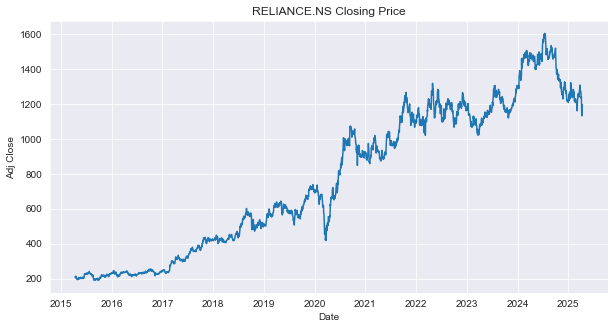

In [86]:
# plot lineplot
stock = 'RELIANCE.NS'
plt.figure(figsize = (10,5))
sns.lineplot(data = stock_data3,x='Date',y='Adj Close')
plt.title(f'{stock} Closing Price')
plt.show()

<AxesSubplot:>

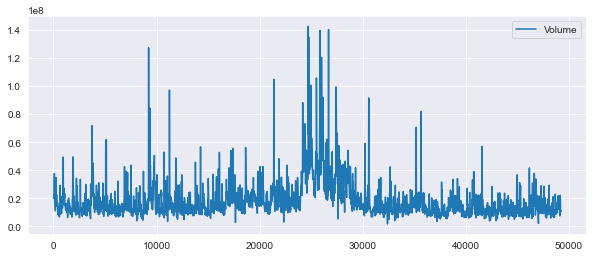

In [87]:
stock_data3['Volume'].plot(legend=True,figsize=(10,4))

In [88]:
Tech_list=stock_data["Ticker"].unique()
Tech_list

array(['APOLLOHOSP.BO', 'ASIANPAINT.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS',
       'HCLTECH.NS', 'HDFCBANK.BO', 'HEROMOTOCO.BO', 'ICICIBANK.BO',
       'INFY.BO', 'ITC.NS', 'KOTAKBANK.NS', 'SBIN.NS', 'TCS.NS',
       'TITAN.NS', 'ULTRACEMCO.NS', 'WIPRO.NS', 'RELIANCE.NS'],
      dtype=object)

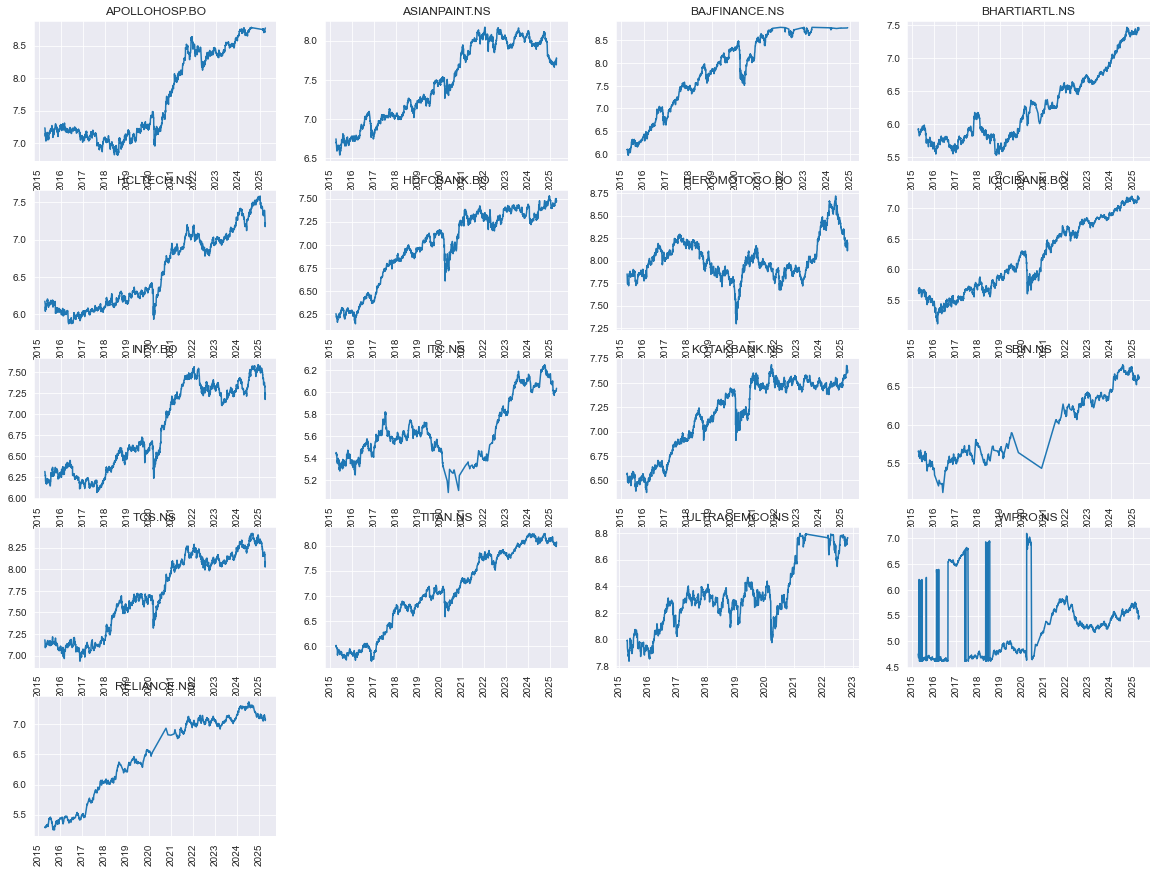

In [89]:
plt.figure(figsize=(20,15))
for i, company in enumerate(Tech_list,1):
    plt.subplot(5,4,i)
    plt.title(company)
    df=stock_data[stock_data["Ticker"]== company]
    plt.plot(df["Date"], df["Close"])
    plt.xticks(rotation="vertical")

In [90]:
stock_data3.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
14 2015-04-13  RELIANCE.NS   206   211  211    205        207  20177342
34 2015-04-15  RELIANCE.NS   206   211  215    207        211  22231264
54 2015-04-16  RELIANCE.NS   207   212  214    210        211  20177302
74 2015-04-17  RELIANCE.NS   207   212  216    211        214  23958678
94 2015-04-20  RELIANCE.NS   198   202  214    201        214  37628162

In [91]:
col=['Open','Low','High','Adj Close']
stock_data3[col] = stock_data3[col].astype(float)

In [92]:
stock_data3["Daily price change"]= stock_data3["Adj Close"]-stock_data3["Open"]

In [93]:
stock_data3.head()

Date       Ticker   Open   High    Low  Close  Adj Close    Volume  \
14 2015-04-13  RELIANCE.NS  206.0  211.0  211.0    205      207.0  20177342   
34 2015-04-15  RELIANCE.NS  206.0  211.0  215.0    207      211.0  22231264   
54 2015-04-16  RELIANCE.NS  207.0  212.0  214.0    210      211.0  20177302   
74 2015-04-17  RELIANCE.NS  207.0  212.0  216.0    211      214.0  23958678   
94 2015-04-20  RELIANCE.NS  198.0  202.0  214.0    201      214.0  37628162   

    Daily price change  
14                 1.0  
34                 5.0  
54                 4.0  
74                 7.0  
94                16.0

In [94]:
stock_data3["% daily price change"]= ((stock_data3["Daily price change"])/stock_data3["Adj Close"])*100

In [95]:
stock_data3.head()

Date       Ticker   Open   High    Low  Close  Adj Close    Volume  \
14 2015-04-13  RELIANCE.NS  206.0  211.0  211.0    205      207.0  20177342   
34 2015-04-15  RELIANCE.NS  206.0  211.0  215.0    207      211.0  22231264   
54 2015-04-16  RELIANCE.NS  207.0  212.0  214.0    210      211.0  20177302   
74 2015-04-17  RELIANCE.NS  207.0  212.0  216.0    211      214.0  23958678   
94 2015-04-20  RELIANCE.NS  198.0  202.0  214.0    201      214.0  37628162   

    Daily price change  % daily price change  
14                 1.0              0.483092  
34                 5.0              2.369668  
54                 4.0              1.895735  
74                 7.0              3.271028  
94                16.0              7.476636

In [96]:
import plotly.express as px
plot=px.line(stock_data3, x="Date", y="% daily price change", title= "RELIANCE.NS")
plot.show()

In [97]:
fig = px.line(stock_data3, x="Date", y="% daily price change", title='Daily price change in stock' ,template = 'plotly_dark')
fig.show()

In [98]:
stock_data3["Smoothed Change"] = stock_data3["% daily price change"].rolling(window=20).mean()

In [99]:
plot = px.line(stock_data3, x="Date", y="Smoothed Change", title="RELIANCE.NS - Smoothed Daily Price Change")
plot.show()

In [100]:
stock_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 14 to 49219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2469 non-null   datetime64[ns]
 1   Ticker                2469 non-null   object        
 2   Open                  2469 non-null   float64       
 3   High                  2469 non-null   float64       
 4   Low                   2469 non-null   float64       
 5   Close                 2469 non-null   Int64         
 6   Adj Close             2469 non-null   float64       
 7   Volume                2469 non-null   Int64         
 8   Daily price change    2469 non-null   float64       
 9   % daily price change  2469 non-null   float64       
 10  Smoothed Change       2450 non-null   float64       
dtypes: Int64(2), datetime64[ns](1), float64(7), object(1)
memory usage: 236.3+ KB


<AxesSubplot:xlabel='Date'>

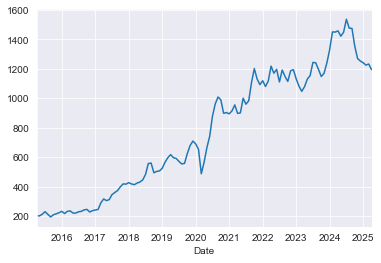

In [101]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data3['Date'] = pd.to_datetime(stock_data3['Date'])
# Set 'Date' as the index
stock_data3.set_index('Date', inplace=True)
# Now you can resample by month and plot the mean of 'Close' prices
stock_data3['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

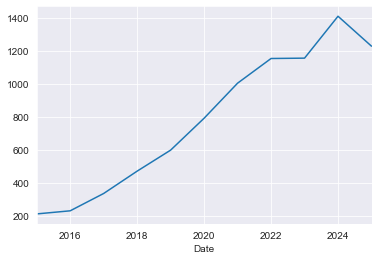

In [102]:
stock_data3['Close'].resample('Y').mean().plot()

In [103]:
col=['Open','High','Low','Adj Close']
stock_data[col]=stock_data[col].astype(float)

In [104]:
# Pivot the dataset to get Close prices for each ticker
close_prices = stock_data.pivot(columns='Ticker', values='Close')
# Reset the index to simple integers
close_prices.reset_index(drop=True, inplace=True)
# Assign index as 1, 2, 3...
close_prices.index = range(1, len(close_prices) + 1)

In [105]:
close_prices.head()

Ticker  APOLLOHOSP.BO  ASIANPAINT.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
1            7.234177            NaN            NaN            NaN   
2                 NaN        6.74876            NaN            NaN   
3                 NaN            NaN        6.09357            NaN   
4                 NaN            NaN            NaN       5.910797   
5                 NaN            NaN            NaN            NaN   

Ticker  HCLTECH.NS  HDFCBANK.BO  HEROMOTOCO.BO  ICICIBANK.BO  INFY.BO  ITC.NS  \
1              NaN          NaN            NaN           NaN      NaN     NaN   
2              NaN          NaN            NaN           NaN      NaN     NaN   
3              NaN          NaN            NaN           NaN      NaN     NaN   
4              NaN          NaN            NaN           NaN      NaN     NaN   
5         6.171701          NaN            NaN           NaN      NaN     NaN   

Ticker  KOTAKBANK.NS  RELIANCE.NS  SBIN.NS  TCS.NS  TITAN.NS  ULTRACEMCO.NS  \
1                NaN          NaN      NaN     NaN       NaN            NaN   
2                NaN          NaN      NaN     NaN       NaN            NaN   
3                NaN          NaN      NaN     NaN       NaN            NaN   
4                NaN          NaN      NaN     NaN       NaN            NaN   
5                NaN          NaN      NaN     NaN       NaN            NaN   

Ticker  WIPRO.NS  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5            NaN

In [106]:
# Fill missing values using forward fill
close_prices.fillna(method='ffill', inplace=True)
# Optionally, use backward fill
close_prices.fillna(method='bfill', inplace=True)

In [107]:
close_prices.head()

Ticker  APOLLOHOSP.BO  ASIANPAINT.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
1            7.234177        6.74876        6.09357       5.910797   
2            7.234177        6.74876        6.09357       5.910797   
3            7.234177        6.74876        6.09357       5.910797   
4            7.234177        6.74876        6.09357       5.910797   
5            7.234177        6.74876        6.09357       5.910797   

Ticker  HCLTECH.NS  HDFCBANK.BO  HEROMOTOCO.BO  ICICIBANK.BO   INFY.BO  \
1         6.171701     6.251904       7.851272       5.66296  6.318968   
2         6.171701     6.251904       7.851272       5.66296  6.318968   
3         6.171701     6.251904       7.851272       5.66296  6.318968   
4         6.171701     6.251904       7.851272       5.66296  6.318968   
5         6.171701     6.251904       7.851272       5.66296  6.318968   

Ticker    ITC.NS  KOTAKBANK.NS  RELIANCE.NS   SBIN.NS    TCS.NS  TITAN.NS  \
1       5.442418      6.559615     5.293305  5.648974  7.181592  5.996452   
2       5.442418      6.559615     5.293305  5.648974  7.181592  5.996452   
3       5.442418      6.559615     5.293305  5.648974  7.181592  5.996452   
4       5.442418      6.559615     5.293305  5.648974  7.181592  5.996452   
5       5.442418      6.559615     5.293305  5.648974  7.181592  5.996452   

Ticker  ULTRACEMCO.NS  WIPRO.NS  
1            7.990577   4.75359  
2            7.990577   4.75359  
3            7.990577   4.75359  
4            7.990577   4.75359  
5            7.990577   4.75359

In [108]:
missing_values = pd.DataFrame(close_prices.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                       
APOLLOHOSP.BO               0
ASIANPAINT.NS               0
BAJFINANCE.NS               0
BHARTIARTL.NS               0
HCLTECH.NS                  0
HDFCBANK.BO                 0
HEROMOTOCO.BO               0
ICICIBANK.BO                0
INFY.BO                     0
ITC.NS                      0
KOTAKBANK.NS                0
RELIANCE.NS                 0
SBIN.NS                     0
TCS.NS                      0
TITAN.NS                    0
ULTRACEMCO.NS               0
WIPRO.NS                    0

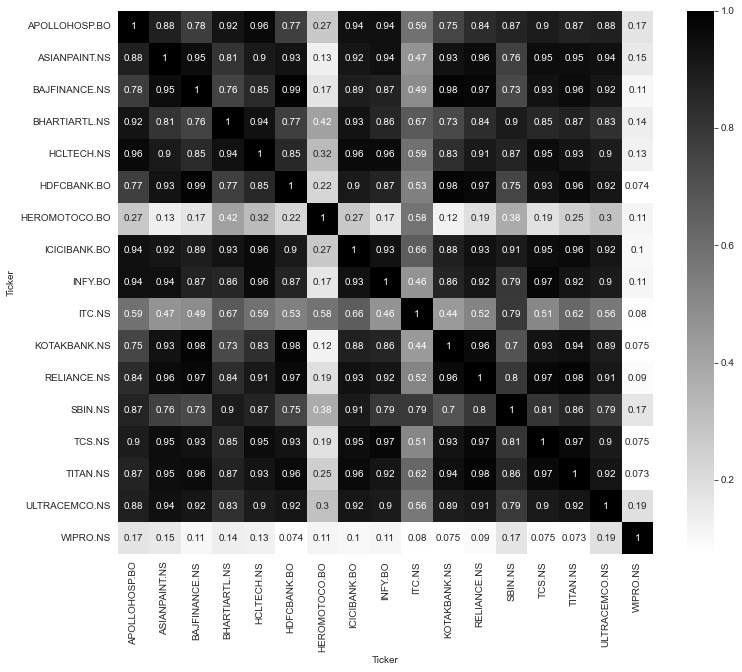

In [109]:
# Set the figure size to make the heatmap larger
plt.figure(figsize=(12, 10))  # Adjust width and height as needed

# Generate the heatmap
sns.heatmap(close_prices.corr(), annot=True, cmap='gray_r', linecolor="black")

# Show the plot
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2015-12-31 00:00:00'),
  Text(1, 0, '2016-12-31 00:00:00'),
  Text(2, 0, '2017-12-31 00:00:00'),
  Text(3, 0, '2018-12-31 00:00:00'),
  Text(4, 0, '2019-12-31 00:00:00'),
  Text(5, 0, '2020-12-31 00:00:00'),
  Text(6, 0, '2021-12-31 00:00:00'),
  Text(7, 0, '2022-12-31 00:00:00'),
  Text(8, 0, '2023-12-31 00:00:00'),
  Text(9, 0, '2024-12-31 00:00:00'),
  Text(10, 0, '2025-12-31 00:00:00')])

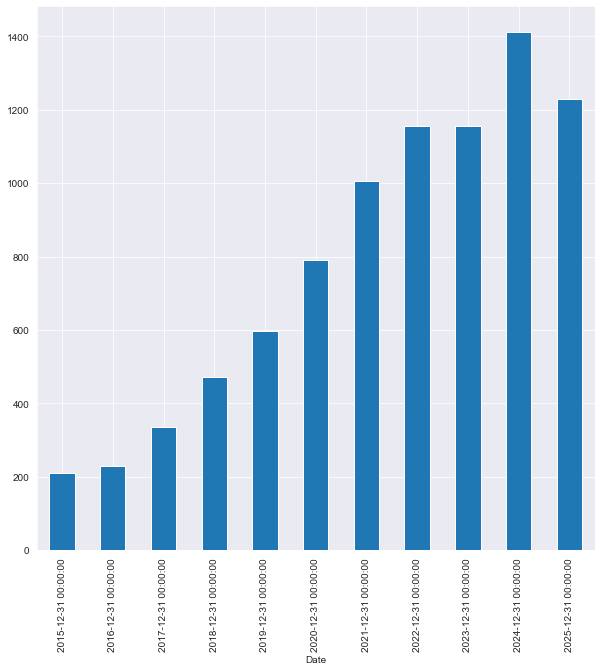

In [110]:
plt.figure(figsize=(10,10))
stock_data3['Close'].resample("Y").mean().plot(kind="bar")
plt.xticks(rotation="vertical")

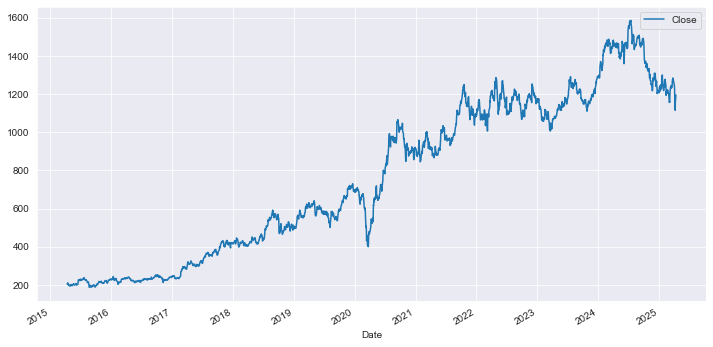

In [111]:
# Let's see a historical view of the closing price
stock_data3['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

In [112]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_data3[column_name]=pd.DataFrame.rolling(stock_data3['Close'],ma).mean()

In [113]:
missing_values = pd.DataFrame(stock_data3.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                   19
MA for 10 days                     9
MA for 20 days                    19
MA for 50 days                    49

In [114]:
# Drop all NaN values from stock_data
stock_data3 = stock_data3.dropna()

In [115]:
missing_values = pd.DataFrame(stock_data3.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0

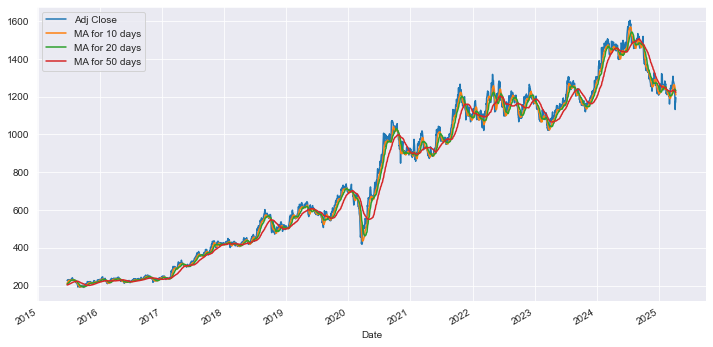

In [116]:
stock_data3[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

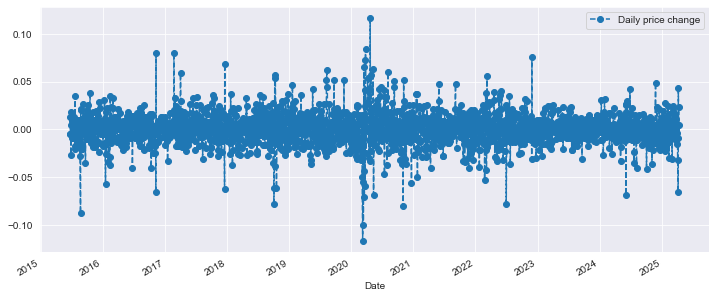

In [117]:
# use pct_change to find the percent change for each day
stock_data3['Daily price change'] =  stock_data3['Close'].pct_change()
# plot the daily return percentage
stock_data3['Daily price change'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

In [118]:
stock_data["Daily price change"]= stock_data["Close"]-stock_data["Open"]
stock_data["% daily price change"]= ((stock_data["Daily price change"])/stock_data["Close"])*100

In [119]:
# Pivot the dataset to organize by Ticker
daily_returns = stock_data.pivot(index='Date', columns='Ticker', values='% daily price change')

# Reset the index to integers if required
daily_returns.reset_index(drop=True, inplace=True)
daily_returns.index = range(1, len(daily_returns) + 1)
daily_returns.head() 

Ticker  APOLLOHOSP.BO  ASIANPAINT.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
1            0.384285       0.913515       0.374691       0.184396   
2            0.428216       1.030443       0.226176       0.652275   
3            0.330284       0.889984      -0.259997       0.735687   
4            0.376957       1.060434       0.148070       0.759766   
5            0.379359       0.944151       0.073868       0.723052   

Ticker  HCLTECH.NS  HDFCBANK.BO  HEROMOTOCO.BO  ICICIBANK.BO   INFY.BO  \
1         3.708884     1.791763       3.902692      1.403227  5.787729   
2         3.976278     1.747509       3.884816      1.348340  5.818125   
3         3.733848     1.685966       3.921760      1.365745  5.711198   
4         3.953935     1.799463       3.858565      1.371640  5.767980   
5         3.850084     1.789904       3.940930      1.309500  5.858797   

Ticker    ITC.NS  KOTAKBANK.NS  RELIANCE.NS   SBIN.NS    TCS.NS  TITAN.NS  \
1       5.312457     -0.278158          NaN  1.495029  2.272339  0.335218   
2            NaN     -0.063605          NaN       NaN  2.329340  0.710064   
3       5.387551     -0.021613          NaN  1.276328  2.371663  0.511399   
4       5.462204     -0.066704          NaN       NaN  2.411620  0.827008   
5       5.515341     -0.022493          NaN  1.482283  2.412881  0.784819   

Ticker  ULTRACEMCO.NS  WIPRO.NS  
1            0.261224  0.365865  
2            0.381067  0.563073  
3            0.324622  0.381869  
4            0.421252  0.779300  
5            0.335149  0.601668

In [120]:
missing_values = pd.DataFrame(daily_returns.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                       
APOLLOHOSP.BO             183
ASIANPAINT.NS               1
BAJFINANCE.NS             744
BHARTIARTL.NS             297
HCLTECH.NS                 29
HDFCBANK.BO                23
HEROMOTOCO.BO              26
ICICIBANK.BO               28
INFY.BO                    24
ITC.NS                    839
KOTAKBANK.NS               20
RELIANCE.NS              1096
SBIN.NS                  1432
TCS.NS                      6
TITAN.NS                    7
ULTRACEMCO.NS             846
WIPRO.NS                  539

In [121]:
# Fill missing values using forward fill
daily_returns.fillna(method='ffill', inplace=True)
# Optionally, use backward fill
daily_returns.fillna(method='bfill', inplace=True)

In [122]:
daily_returns.head() 

Ticker  APOLLOHOSP.BO  ASIANPAINT.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
1            0.384285       0.913515       0.374691       0.184396   
2            0.428216       1.030443       0.226176       0.652275   
3            0.330284       0.889984      -0.259997       0.735687   
4            0.376957       1.060434       0.148070       0.759766   
5            0.379359       0.944151       0.073868       0.723052   

Ticker  HCLTECH.NS  HDFCBANK.BO  HEROMOTOCO.BO  ICICIBANK.BO   INFY.BO  \
1         3.708884     1.791763       3.902692      1.403227  5.787729   
2         3.976278     1.747509       3.884816      1.348340  5.818125   
3         3.733848     1.685966       3.921760      1.365745  5.711198   
4         3.953935     1.799463       3.858565      1.371640  5.767980   
5         3.850084     1.789904       3.940930      1.309500  5.858797   

Ticker    ITC.NS  KOTAKBANK.NS  RELIANCE.NS   SBIN.NS    TCS.NS  TITAN.NS  \
1       5.312457     -0.278158     0.190828  1.495029  2.272339  0.335218   
2       5.312457     -0.063605     0.190828  1.495029  2.329340  0.710064   
3       5.387551     -0.021613     0.190828  1.276328  2.371663  0.511399   
4       5.462204     -0.066704     0.190828  1.276328  2.411620  0.827008   
5       5.515341     -0.022493     0.190828  1.482283  2.412881  0.784819   

Ticker  ULTRACEMCO.NS  WIPRO.NS  
1            0.261224  0.365865  
2            0.381067  0.563073  
3            0.324622  0.381869  
4            0.421252  0.779300  
5            0.335149  0.601668

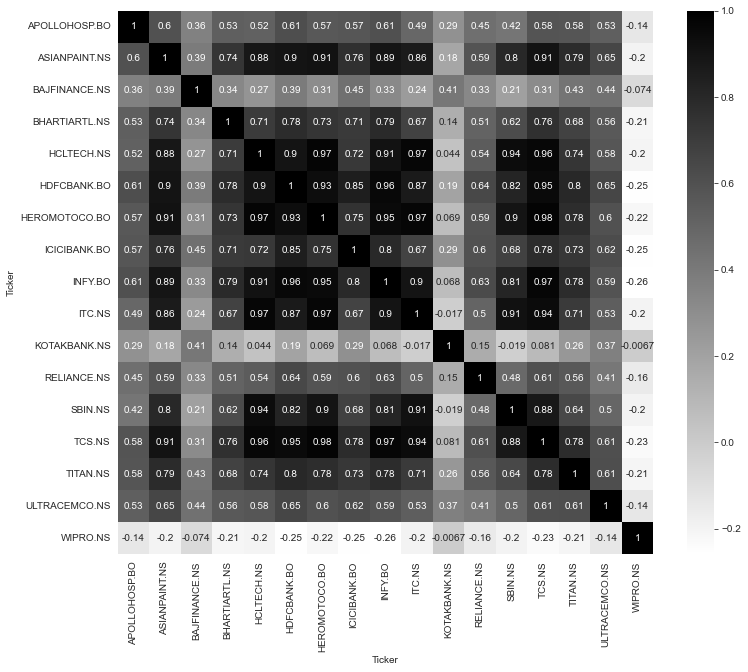

In [123]:
# Set the figure size to make the heatmap larger
plt.figure(figsize=(12, 10))  # Adjust width and height as needed

# Generate the heatmap
sns.heatmap(daily_returns.corr(), annot=True, cmap='gray_r', linecolor="black")

# Show the plot
plt.show()

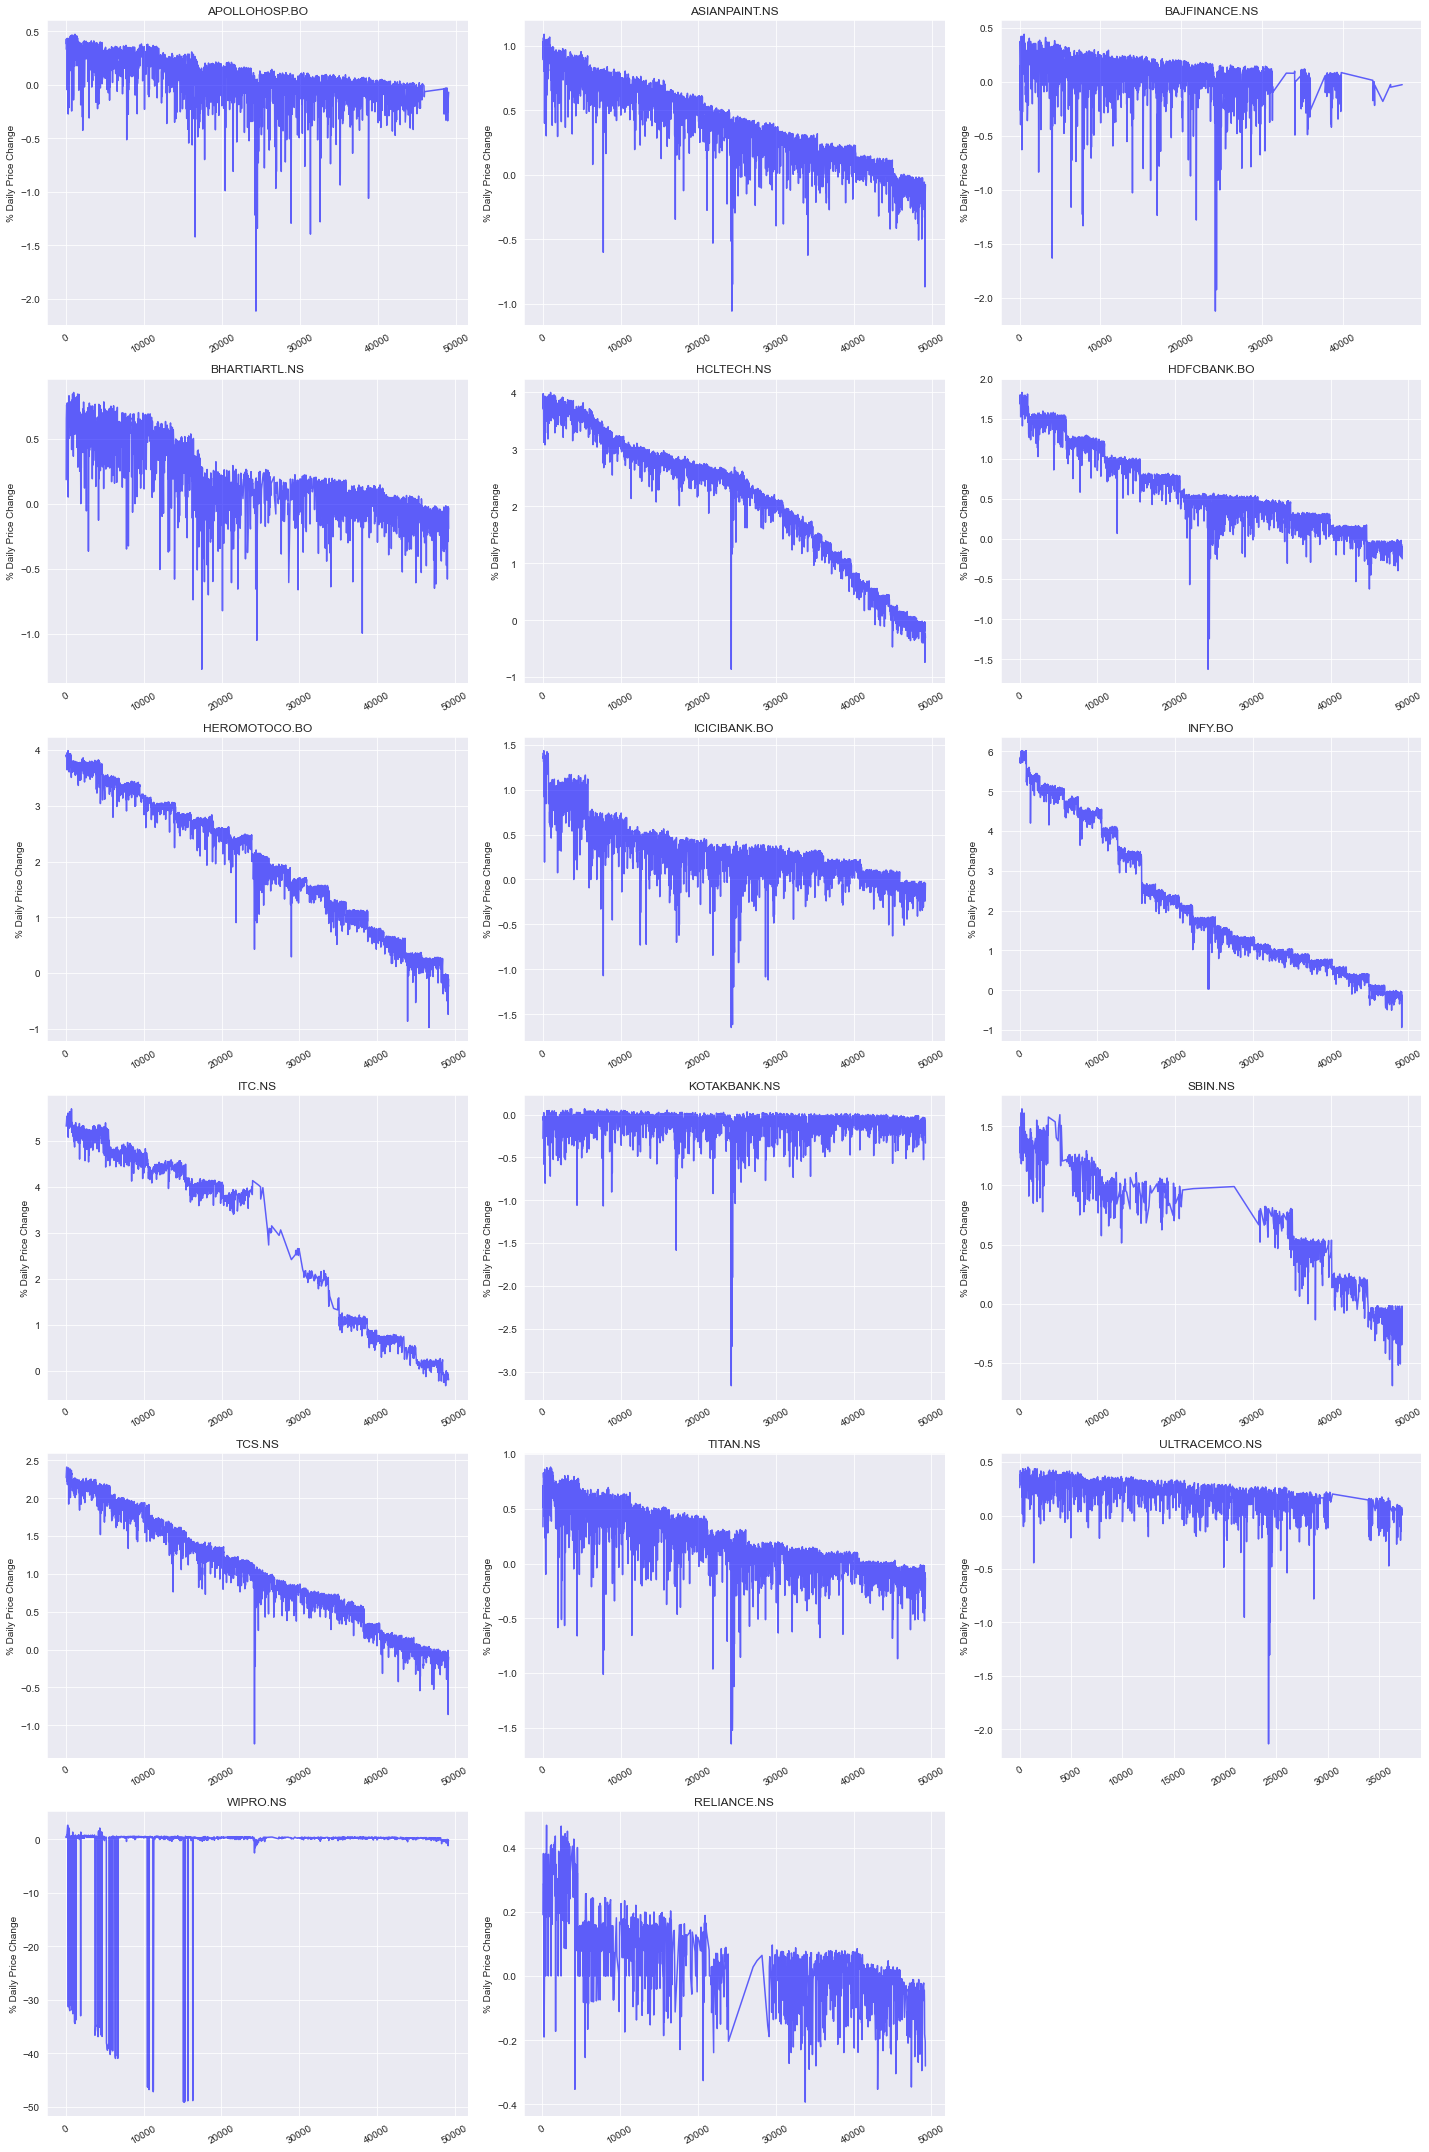

In [124]:
import matplotlib.pyplot as plt

# Store filtered stock data for each unique ticker
all_stock_data = {ticker: stock_data[stock_data["Ticker"] == ticker] for ticker in stock_data['Ticker'].unique()}

# Calculate the number of unique tickers
n_tickers = len(all_stock_data)
ncols = 3  # Keep 3 columns for better visibility
nrows = (n_tickers // ncols) + (n_tickers % ncols > 0)  # Adjust row count

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))  # Set dynamic figure size
axes = axes.flatten()  # Flatten for easy iteration

# Plot each ticker's daily price change on its respective subplot
for i, (ticker, data) in enumerate(all_stock_data.items()):
    axes[i].plot(data.index, data["% daily price change"], color="blue", alpha=0.6)
    axes[i].set_title(ticker, fontsize=12)  # Set title as the ticker name
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_ylabel("% Daily Price Change", fontsize=10)

# Hide unused subplots (if tickers < total subplots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [125]:
stock_data["Smoothed Change"] = stock_data["% daily price change"].rolling(window=30).mean()  # Apply smoothing
stock_data.dropna(inplace=True)  # Remove NaN values

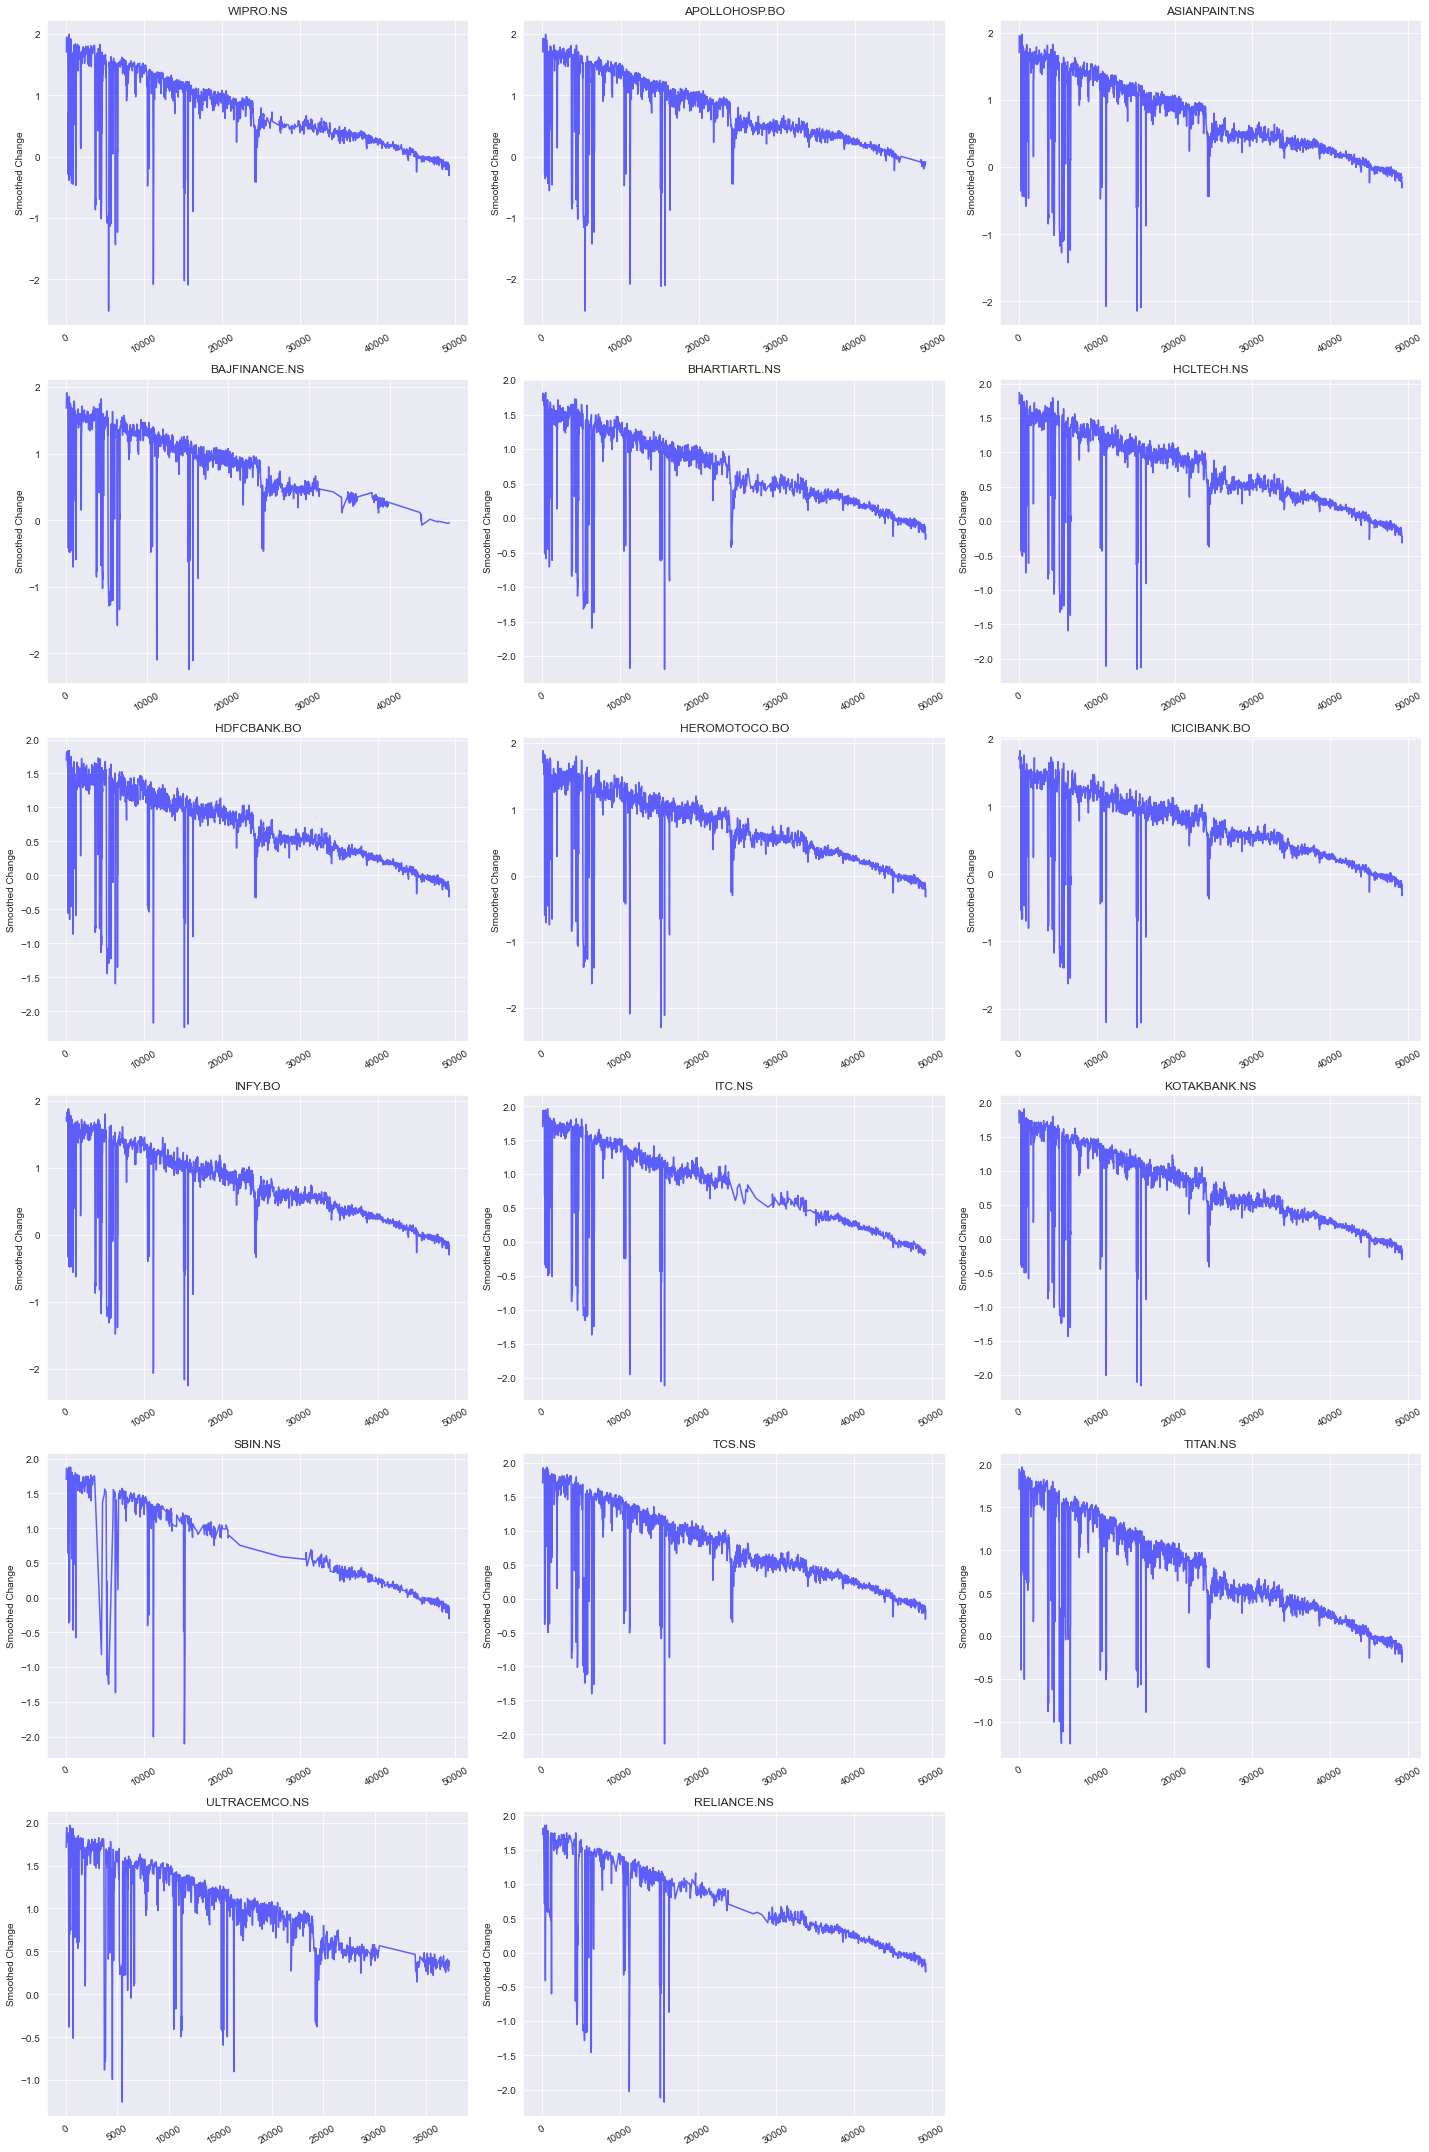

In [126]:
import matplotlib.pyplot as plt

# Store filtered stock data for each unique ticker
all_stock_data = {ticker: stock_data[stock_data["Ticker"] == ticker] for ticker in stock_data['Ticker'].unique()}

# Calculate the number of unique tickers
n_tickers = len(all_stock_data)
ncols = 3  # Keep 3 columns for better visibility
nrows = (n_tickers // ncols) + (n_tickers % ncols > 0)  # Adjust row count

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))  # Set dynamic figure size
axes = axes.flatten()  # Flatten for easy iteration

# Plot each ticker's daily price change on its respective subplot
for i, (ticker, data) in enumerate(all_stock_data.items()):
    axes[i].plot(data.index, data["Smoothed Change"], color="blue", alpha=0.6)
    axes[i].set_title(ticker, fontsize=12)  # Set title as the ticker name
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_ylabel("Smoothed Change", fontsize=10)

# Hide unused subplots (if tickers < total subplots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [127]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [128]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0

In [129]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_data[column_name]=pd.DataFrame.rolling(stock_data['Adj Close'],ma).mean()
stock_data.dropna(inplace=True)  # Remove NaN values

In [130]:
stock_data["EMA_10"] = stock_data["Adj Close"].ewm(span=10, adjust=False).mean()  # Short-term trend
stock_data["EMA_50"] = stock_data["Adj Close"].ewm(span=50, adjust=False).mean()  # Medium-term trend
stock_data["EMA_200"] = stock_data["Adj Close"].ewm(span=200, adjust=False).mean()  # Long-term trend

In [131]:
# Create target variable (Close Price after 365 days)
stock_data["Close_365"] = stock_data["Close"].shift(0)
# Drop rows with NaN target values (since shifting creates NaNs)
stock_data = stock_data.dropna()

In [132]:
stock_data.columns

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Daily price change', '% daily price change', 'Smoothed Change',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'EMA_10',
       'EMA_50', 'EMA_200', 'Close_365'],
      dtype='object')

In [133]:
delta = stock_data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_data['RSI_14'] = 100 - (100 / (1 + rs))

stock_data['SMA_20'] = stock_data['Adj Close'].rolling(window=20).mean()
stock_data['BB_Upper'] = stock_data['SMA_20'] + (stock_data['Adj Close'].rolling(window=20).std() * 2)
stock_data['BB_Lower'] = stock_data['SMA_20'] - (stock_data['Adj Close'].rolling(window=20).std() * 2)

stock_data['MACD'] = stock_data['EMA_10'] - stock_data['EMA_50']

In [134]:
stock_data.head()

Ticker      Open      High       Low     Close  Adj Close  \
Date                                                                           
2015-04-21  ASIANPAINT.NS  6.608001  6.701960  6.608001  6.675823   6.701960   
2015-04-21  BAJFINANCE.NS  6.052089  6.111467  6.052089  6.028279   6.111467   
2015-04-21  BHARTIARTL.NS  5.834811  5.886104  5.834811  5.874931   5.883322   
2015-04-21     HCLTECH.NS  5.849325  6.100319  5.849325  6.037871   6.042633   
2015-04-21    HDFCBANK.BO  6.104793  6.224558  6.104793  6.212606   6.224558   

               Volume  Daily price change  % daily price change  \
Date                                                              
2015-04-21  13.388796            0.067823              1.015944   
2015-04-21  14.044542           -0.023811             -0.394983   
2015-04-21  15.277784            0.040120              0.682902   
2015-04-21  16.496278            0.188546              3.122726   
2015-04-21  12.111097            0.107813              1.735389   

            Smoothed Change  ...  MA for 50 days    EMA_10    EMA_50  \
Date                         ...                                       
2015-04-21         1.959154  ...        6.361412  6.701960  6.701960   
2015-04-21         1.920663  ...        6.388227  6.594598  6.678804   
2015-04-21         1.811628  ...        6.361038  6.465275  6.647608   
2015-04-21         1.855737  ...        6.347318  6.388431  6.623884   
2015-04-21         1.784964  ...        6.349713  6.358636  6.608224   

             EMA_200  Close_365  RSI_14  SMA_20  BB_Upper  BB_Lower      MACD  
Date                                                                           
2015-04-21  6.701960   6.675823     NaN     NaN       NaN       NaN  0.000000  
2015-04-21  6.696085   6.028279     NaN     NaN       NaN       NaN -0.084206  
2015-04-21  6.687998   5.874931     NaN     NaN       NaN       NaN -0.182333  
2015-04-21  6.681576   6.037871     NaN     NaN       NaN       NaN -0.235453  
2015-04-21  6.677029   6.212606     NaN     NaN       NaN       NaN -0.249588  

[5 rows x 22 columns]

In [135]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0
EMA_10                             0
EMA_50                             0
EMA_200                            0
Close_365                          0
RSI_14                            13
SMA_20                            19
BB_Upper                          19
BB_Lower                          19
MACD                               0

In [136]:
# Drop rows with NaN target values (since shifting creates NaNs)
stock_data = stock_data.dropna()

In [137]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0
EMA_10                             0
EMA_50                             0
EMA_200                            0
Close_365                          0
RSI_14                             0
SMA_20                             0
BB_Upper                           0
BB_Lower                           0
MACD                               0

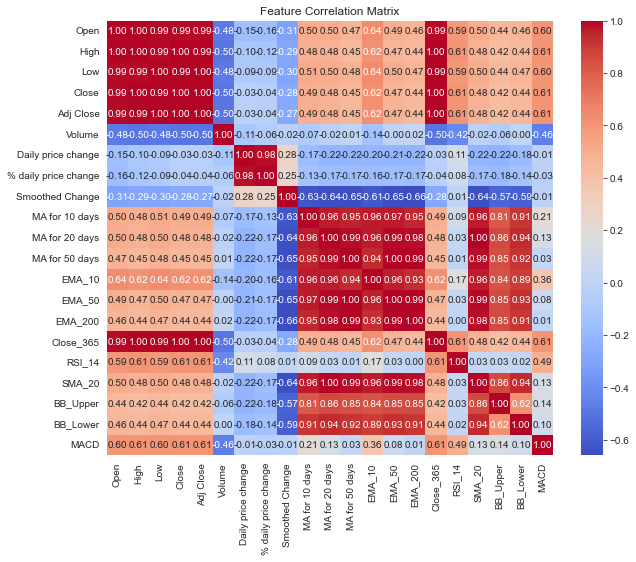

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
correlation_matrix = stock_data.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [139]:
# Define features (X) and target variable (y)
X = stock_data.drop(columns=["Close_365", "Ticker", "Volume", "Close"])  # Drop less relevant features
y = stock_data["Close_365"]  # Target variable (Close price after 365 days)

In [140]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from keras.models import Sequential
import keras.backend as K  # Corrected import syntax
from keras.callbacks import EarlyStopping  # Corrected "Callbacks" to "callbacks"
from keras.optimizers import Adam  # Corrected "Optimisers" to "optimizers"
from keras.models import load_model  # Corrected "Models" to "models"
from keras.utils import plot_model  # Corrected "utils. vis_utils" spacing

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28602, 18)
(7151, 18)
(28602,)
(7151,)


In [142]:
Scaler = MinMaxScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

# Scale y
Scaler_y = MinMaxScaler()
y_train_scaled = Scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = Scaler_y.transform(y_test.values.reshape(-1, 1))

In [143]:
# Convert DataFrame to NumPy array before reshaping
X_train_array = np.array(X_train_scaled)  # Convert DataFrame to NumPy
X_test_array = np.array(X_test_scaled)    # Convert DataFrame to NumPy

# Reshape for LSTM (3D input: [samples, timesteps, features])
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

In [144]:
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
# Build LSTM Model
lstm_model = Sequential([
    LSTM(32, return_sequences=False, activation='tanh', 
         input_shape=(1, X_train_reshaped.shape[2]), 
         kernel_regularizer=l2(5e-4)),  # L2 Regularization
    Dropout(0.6),  # Regularization to prevent overfitting
    
    Dense(64, activation='relu', kernel_regularizer=l2(5e-4)),
    Dense(1)  # Predicts stock price
])

In [145]:
import tensorflow as tf
# Compile Model with Adam Optimizer & Learning Rate Scheduling
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), loss='mse')

In [146]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# Train the model
history = lstm_model.fit(
    X_train_reshaped, y_train_scaled, 
    epochs=100, batch_size=32, 
    validation_data=(X_test_reshaped, y_test_scaled), 
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0403 - val_loss: 0.0039 - learning_rate: 0.0040
Epoch 2/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0045 - val_loss: 0.0032 - learning_rate: 0.0040
Epoch 3/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0039 - val_loss: 0.0021 - learning_rate: 0.0040
Epoch 4/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0034 - val_loss: 0.0108 - learning_rate: 0.0040
Epoch 5/100
894/894 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0034 - val_loss: 0.0060 - learning_rate: 0.0040
Epoch 6/100
874/894 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0020000000949949026.
894/894 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0033 - val_loss: 0.0058 - learning_rate: 0.0040
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


In [147]:
#  Make Predictions
y_pred_lstm = lstm_model.predict(X_test_reshaped)

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [148]:
# Inverse transform
y_pred_actual = Scaler_y.inverse_transform(y_pred_lstm)
y_test_actual = Scaler_y.inverse_transform(y_test_scaled)

In [149]:
# Metrics
mse_lstm = mean_squared_error(y_test_actual, y_pred_actual)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_actual, y_pred_actual)
print(f"Mean Squared Error (MSE): {mse_lstm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")
print(f"R² Score: {r2_lstm:.4f}")

Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13
R² Score: 0.9796


In [150]:
from sklearn.svm import SVR
# Train SVR model
svr_model = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=0.1)  # Adjust hyperparameters if needed
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(C=1, gamma=0.001)

In [151]:
# Predict
y_pred_svr = svr_model.predict(X_test_scaled)

In [152]:
# Evaluate Performance
mse_svr = mean_squared_error(y_test_scaled, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test_scaled, y_pred_svr)

print(f"SVR Model Performance:")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")

SVR Model Performance:
Mean Squared Error (MSE): 0.0021
Root Mean Squared Error (RMSE): 0.0462
R² Score: 0.9582


In [153]:
from sklearn.ensemble import RandomForestRegressor
# Define the Random Forest model with adjusted hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=20,       # Fewer trees to reduce overfitting
    max_depth=3,           # Shallower trees
    min_samples_split=20,  # Increase minimum samples for splits
    min_samples_leaf=10,   # Increase minimum samples per leaf
    max_features='log2',   # Increase randomness
    random_state=42,       # Ensure reproducibility
    n_jobs=-1              # Use all available cores
)

In [154]:
# Train the Model
rf_model.fit(X_train_scaled, y_train_scaled)  # Reshape to 2D for RF

RandomForestRegressor(max_depth=3, max_features='log2', min_samples_leaf=10,
                      min_samples_split=20, n_estimators=20, n_jobs=-1,
                      random_state=42)

In [155]:
# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [156]:
# Performance Metrics
mse_rf = mean_squared_error(y_test_scaled, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test_scaled, y_pred_rf)

print(f"Random Forest Model Performance:\nMSE: {mse_rf:.4f}\nRMSE: {rmse_rf:.4f}\nR² Score: {r2_rf:.4f}")

Random Forest Model Performance:
MSE: 0.0016
RMSE: 0.0404
R² Score: 0.9681


In [157]:
# Ensure y_test and y_pred are 1D arrays
y_test_scaled = np.ravel(y_test_scaled)  # Converts to 1D
y_pred_lstm = np.ravel(y_pred_lstm)
y_pred_svr = np.ravel(y_pred_svr)
y_pred_rf = np.ravel(y_pred_rf)

In [161]:
from sklearn.metrics import mean_absolute_error


# Calculate MAE for each model
mae_lstm = mean_absolute_error(y_test_scaled, y_pred_lstm)        # LSTM
mae_svr = mean_absolute_error(y_test_scaled, y_pred_svr)  # SVM
mae_rf = mean_absolute_error(y_test_scaled, y_pred_rf)  # Random Forest

# Function to Calculate Adjusted R² Score
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Calculate Adjusted R² Scores
n = len(y_test_scaled)  # Number of test samples
k = X_test_scaled.shape[1]  # Number of features

adj_r2_lstm = adjusted_r2(r2_lstm, n, k)
adj_r2_svr = adjusted_r2(r2_svr, n, k)
adj_r2_rf = adjusted_r2(r2_rf, n, k)

# Function to Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lstm = mean_absolute_percentage_error(y_test_scaled, y_pred_lstm)
mape_svr = mean_absolute_percentage_error(y_test_scaled, y_pred_svr)
mape_rf = mean_absolute_percentage_error(y_test_scaled, y_pred_rf)

model_comparison = model_comparison.drop(columns=["MAPE"])


model_comparison = pd.DataFrame({
    "Model": ["LSTM", "SVM", "Random Forest"],
    "MSE": [mse_lstm, mse_svr, mse_rf],
    "RMSE": [rmse_lstm, rmse_svr, rmse_rf],
    "MAE": [mae_lstm, mae_svr, mae_rf],
    "R²": [r2_lstm, r2_svr, r2_rf],
    "Adj_R²": [adj_r2_lstm, adj_r2_svr, adj_r2_rf],
    "Accuracy (%)": [r2_lstm * 100, r2_svr * 100, r2_rf * 100]
})


# Display the Comparison Table
print("\n📊 Model Performance Comparison Table:")
model_comparison.head()


📊 Model Performance Comparison Table:


Model       MSE      RMSE       MAE        R²    Adj_R²  \
0           LSTM  0.018188  0.134862  0.029172  0.979636  0.979585   
1            SVM  0.002138  0.046235  0.037515  0.958215  0.958110   
2  Random Forest  0.001633  0.040413  0.029822  0.968076  0.967995   

   Accuracy (%)  
0     97.963649  
1     95.821524  
2     96.807567

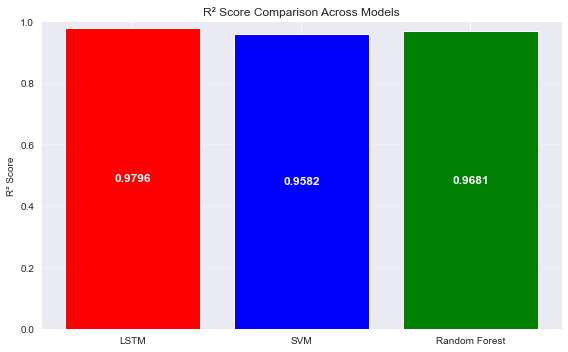

In [164]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'SVM', 'Random Forest']
r2_scores = [0.9796, 0.9582, 0.9681]  # Replace with your actual computed values

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color=['red', 'blue', 'green'])

# Add Labels and Title
plt.ylabel("R² Score")
plt.title("R² Score Comparison Across Models")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add R² values inside the bars
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2,
             f"{score:.4f}", ha='center', va='center', color='white',
             fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [165]:
import tensorflow as tf
# Assuming `lstm_model` is your trained model
lstm_model.save("..\yfinance-server\src\model\stock_price.keras")  # Save the model in .h5 format

In [166]:
print(lstm_model.input_shape)  # Check expected input shape

(None, 1, 18)


In [167]:
import pickle
# ---- Save the scaler ----
with open('..\yfinance-server\src\model\scaler_x.pkl', 'wb') as f:
    pickle.dump(Scaler, f)
# Save output scaler
with open("..\yfinance-server\src\model\scaler_y.pkl", "wb") as f:
    pickle.dump(Scaler_y, f)

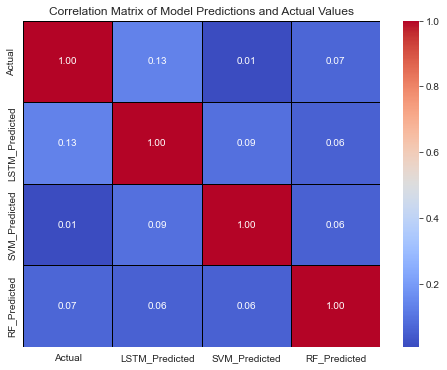

In [173]:
# Example of actual values (y_test) and predicted values from models
# Replace these with your actual data
y_test = np.random.rand(100)  # Actual values (replace with y_test)
y_pred_lstm = np.random.rand(100)  # Predicted values from LSTM (replace with actual predictions)
y_pred_svr = np.random.rand(100)  # Predicted values from SVM (replace with actual predictions)
y_pred_rf = np.random.rand(100)  # Predicted values from Random Forest (replace with actual predictions)

# Create a DataFrame with actual and predicted values
model_predictions = pd.DataFrame({
    'Actual': y_test,
    'LSTM_Predicted': y_pred_lstm,
    'SVM_Predicted': y_pred_svr,
    'RF_Predicted': y_pred_rf
})

# Calculate the correlation matrix
correlation_matrix = model_predictions.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix of Model Predictions and Actual Values')
plt.show()